In [1]:
from tqdm import tqdm
import scipy.interpolate
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pylab as pl
import matplotlib.dates as mdates
import shutil
import os
from scores import *
from datagrab import *
from scoresplots import *

In [2]:
gitdir = "/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/"
figuresdirectory = "/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Figures"
covidhubdir = '/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed'

# READ PREDICTIONS FROM COVID HUB

In [ ]:
newPath = shutil.copy('R/read_processed_dataONY.R', 
                      covidhubdir)
os.chdir(gitdir)
rm *.csv
# !git fetch origin
# !git reset --hard origin/master
!git pull
!Rscript read_processed_dataONY.R #Read cum death predictions

# BUILD SCOREBOARD

## BUILD SCOREBOARD FOR INCIDENTAL CASES

In [ ]:
US_cases = readobservedcases()
plotUSIncCases(US_cases)

In [ ]:
getscoreboard(US_cases,'Case','ScoreboardCases.pkl')

Maximum % conversion error:
2.2266702024869356
Unique models in the scoreboard:
0. CEID:Walk
1. COVIDhub:baseline
2. COVIDhub:ensemble
3. CU:nochange
4. CU:scenario_high
5. CU:scenario_low
6. CU:scenario_mid
7. CU:select
8. Columbia_UNC:SurvCon
9. Covid19Sim:Simulator
10. CovidAnalytics:DELPHI
11. DDS:NBDS
12. IHME:CurveFit
13. IowaStateLW:STEM
14. JHU_IDD:CovidSP
15. Karlen:pypm
16. LANL:GrowthRate
17. LNQ:ens1
18. OliverWyman:Navigator
19. QJHong:Encounter
20. RobertWalraven:ESG
21. UCLA:SuEIR
22. UMich:RidgeTfReg
23. USACE:ERDC_SEIR
24. JHUAPL:Bucky
Models in Scoreboard that are not yet in modeltypes.dat:
[]
Edit modeltypes.dat accordingly


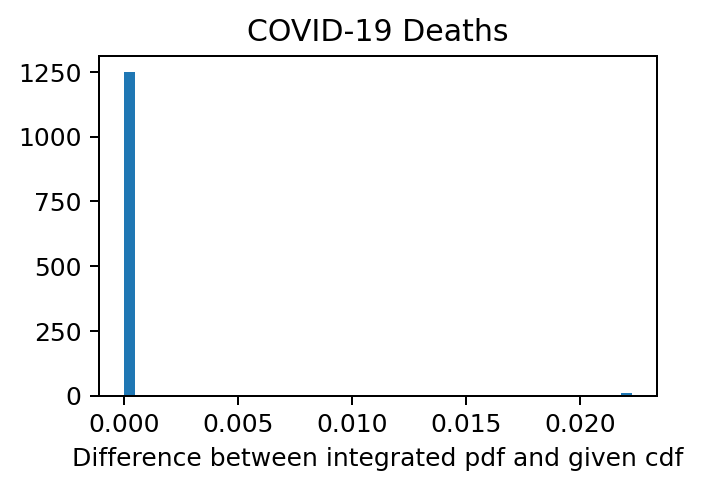

In [3]:
ScoreboardCases = pd.read_pickle('ScoreboardCases.pkl')
plotdifferencescdfpdf(ScoreboardCases)
modeltypesCases = getmodeltypes(ScoreboardCases)

In [ ]:
%%capture cap --no-stderr
themodels = ScoreboardCases['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [ ]:
#Writing out all the models into a text file
with open(gitdir+'INCCASE_Models.txt', 'w') as f:
    f.write(cap.stdout)

In [ ]:
plotallscoresdist(ScoreboardCases,figuresdirectory,'Case')

In [ ]:
plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',1)

In [ ]:
plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',4)

In [ ]:
plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'CEID:Walk')

## BUILD SCOREBOARD FOR CUMULATIVE DEATHS

In [ ]:
US_deaths = readobserveddeaths()
plotUSCumDeaths(US_deaths)

In [ ]:
getscoreboard(US_deaths,'Death','ScoreboardDeaths.pkl')

Maximum % conversion error:
2.5793983820063593
Unique models in the scoreboard:
0. Auquan:SEIR
1. COVIDhub:baseline
2. COVIDhub:ensemble
3. CU:nochange
4. CU:scenario_high
5. CU:scenario_low
6. CU:scenario_mid
7. CU:select
8. Covid19Sim:Simulator
9. CovidAnalytics:DELPHI
10. GT:DeepCOVID
11. IHME:CurveFit
12. Imperial:ensemble1
13. Imperial:ensemble2
14. IowaStateLW:STEM
15. JHU_IDD:CovidSP
16. LANL:GrowthRate
17. MOBS:GLEAM_COVID
18. PSI:DRAFT
19. SWC:TerminusCM
20. UA:EpiCovDA
21. UCLA:SuEIR
22. UMass:MechBayes
23. USACE:ERDC_SEIR
24. UT:Mobility
25. YYG:ParamSearch
26. CovidActNow:SEIR_CAN
27. OliverWyman:Navigator
28. epiforecasts:ensemble1
29. NotreDame:mobility
30. MITCovAlliance:SIR
31. Columbia_UNC:SurvCon
32. QJHong:Encounter
33. RobertWalraven:ESG
34. UMich:RidgeTfReg
35. DDS:NBDS
36. Karlen:pypm
37. UCM_MESALab:FoGSEIR
38. RPI_UW:Mob_Collision
39. CEID:Walk
40. LNQ:ens1
41. SteveMcConnell:CovidComplete
42. WalmartLabsML:LogForecasting
43. JHUAPL:Bucky
44. UCSD_NEU:DeepGLEAM


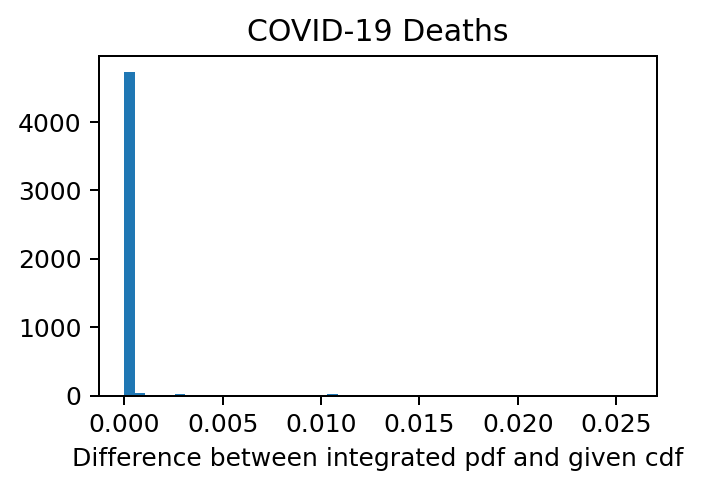

In [4]:
ScoreboardDeaths = pd.read_pickle('ScoreboardDeaths.pkl')
plotdifferencescdfpdf(ScoreboardDeaths)
modeltypesDeaths = getmodeltypes(ScoreboardDeaths)

In [ ]:
%%capture cap --no-stderr
themodels = ScoreboardDeaths['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [ ]:
#Writing out all the models into a text file
with open(gitdir+'CUMDEATH_Models.txt', 'w') as f:
    f.write(cap.stdout)

In [ ]:
plotallscoresdist(ScoreboardDeaths,figuresdirectory,'Death')

In [ ]:
plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',1)

In [ ]:
plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',4)

In [ ]:
plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',1,'COVIDhub:baseline')

# More Scores

In [ ]:
Scoreboard.replace([np.inf, -np.inf], np.nan,inplace=True)
Scoreboard.dropna(inplace=True)
Scoreboard = Scoreboard.sort_values('forecast_date').drop_duplicates(subset=['model', 'target_end_date'], keep='last').copy()
Scoreboard.reset_index(inplace=True)
#np.median(Scoreboard["value"].to_list())
# pd.DataFrame(Scoreboard['quantile'].to_list()).idxmax(axis=1)
# pd.DataFrame(Scoreboard['quantile'].to_list()).idxmin(axis=1)
Scoreboard['score'] = 1
Scoreboard['CIHI']=pd.DataFrame(Scoreboard['value'].to_list()).max(axis=1)
Scoreboard['CILO']=pd.DataFrame(Scoreboard['value'].to_list()).min(axis=1)
Scoreboard['PE']=pd.DataFrame(Scoreboard['value'].to_list()).median(axis=1)
Scoreboard['scorecontr']=np.exp(-Scoreboard['score']/2)
Scoreboard['CIHI_W']=Scoreboard['CIHI']*Scoreboard['scorecontr']
Scoreboard['CILO_W']=Scoreboard['CILO']*Scoreboard['scorecontr']
Scoreboard['PE_W']=Scoreboard['PE']*Scoreboard['scorecontr']
Scoreboard['P_W']=Scoreboard['p']*Scoreboard['scorecontr']
Scoreboard.head(3)

In [ ]:
Scoreboardlate = Scoreboard[Scoreboard['forecast_date']>='2020-07-01'].copy()
Scoreboardlate.head(3)

In [ ]:
frozenscores = Scoreboard[Scoreboard['forecast_date']<'2020-07-01'].groupby('model')['score'].mean().reset_index()
frozenscores
rename_dict = frozenscores.set_index('model').to_dict()['score']

Scoreboardlate['score'] = np.nan
Scoreboardlate['score'] = Scoreboardlate.set_index(['model']).index.map(rename_dict.get)
Scoreboardlate.dropna(inplace=True)

Scoreboardlate.replace([np.inf, -np.inf], np.nan,inplace=True)
Scoreboardlate['scorecontr']=np.exp(-Scoreboardlate['score']/2)
Scoreboardlate['CIHI_W']=Scoreboardlate['CIHI']*Scoreboardlate['scorecontr']
Scoreboardlate['CILO_W']=Scoreboardlate['CILO']*Scoreboardlate['scorecontr']
Scoreboardlate['PE_W']=Scoreboardlate['PE']*Scoreboardlate['scorecontr']
Scoreboardlate['P_W']=Scoreboardlate['p']*Scoreboardlate['scorecontr']

In [ ]:
# Scoreboard.to_csv('Scoreboard.csv')
scoreweighted = (Scoreboardlate.groupby(['target_end_date'],
                                        as_index=False)[['scorecontr','CIHI_W','CILO_W','PE_W', 'P_W','deaths']].agg(lambda x: list(x)))
scoreweighted['sumW']=pd.DataFrame(scoreweighted['scorecontr'].to_list()).sum(axis=1)
scoreweighted['avgCIHI']=pd.DataFrame(scoreweighted['CIHI_W'].to_list()).sum(axis=1)/scoreweighted['sumW']
scoreweighted['avgCILO']=pd.DataFrame(scoreweighted['CILO_W'].to_list()).sum(axis=1)/scoreweighted['sumW']
scoreweighted['avgPE']=pd.DataFrame(scoreweighted['PE_W'].to_list()).sum(axis=1)/scoreweighted['sumW']
scoreweighted['avgP']=2*np.log(pd.DataFrame(scoreweighted['P_W'].to_list()).sum(axis=1)/scoreweighted['sumW'])+1+np.log(pd.DataFrame(scoreweighted['deaths'].to_list()).min(axis=1))+np.log(2*np.pi)
scoreweighted.to_csv('ScorelateWeightedProj.csv')

In [ ]:
# Scoreboard.to_csv('Scoreboard.csv')
scoreweighted = (Scoreboard.groupby(['target_end_date'],
                                        as_index=False)[['scorecontr','CIHI_W','CILO_W','PE_W', 'P_W','deaths']].agg(lambda x: list(x)))
scoreweighted['sumW']=pd.DataFrame(scoreweighted['scorecontr'].to_list()).sum(axis=1)
scoreweighted['avgCIHI']=pd.DataFrame(scoreweighted['CIHI_W'].to_list()).sum(axis=1)/scoreweighted['sumW']
scoreweighted['avgCILO']=pd.DataFrame(scoreweighted['CILO_W'].to_list()).sum(axis=1)/scoreweighted['sumW']
scoreweighted['avgPE']=pd.DataFrame(scoreweighted['PE_W'].to_list()).sum(axis=1)/scoreweighted['sumW']
scoreweighted['avgP']=2*np.log(pd.DataFrame(scoreweighted['P_W'].to_list()).sum(axis=1)/scoreweighted['sumW'])+1+np.log(pd.DataFrame(scoreweighted['deaths'].to_list()).min(axis=1))+np.log(2*np.pi)
scoreweighted.to_csv('ScoreWeightedProj.csv')

In [ ]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
models = Scoreboard['model'].unique()
colors = pl.cm.jet(np.linspace(0,1,len(models)))
i = 10
#for curmod in models:
curmod = 'Score Weighted Ensemble'    
dates = scoreweighted.target_end_date
P = scoreweighted.avgP
# CIlow = scoreweighted.avgCILO
# CIhi = scoreweighted.avgCIHI

modcol = (colors[i].tolist()[0],
          colors[i].tolist()[1],
          colors[i].tolist()[2])

#plt.plot(US_deaths['DateObserved'],US_deaths['Deaths'],color='k',linewidth=7.0,label='Observed')    

plt.plot(dates,P,color=modcol,label=curmod,linewidth=4.0)
# plt.fill_between(dates, CIlow, CIhi, color=modcol, alpha=.1)

# plt.ylim([0,260000])
plt.ylabel('Score: US Cumulative Deaths', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='upper left')
plt.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.savefig(gitdir+'Figures/Projections/Score_ScoreWeighted4wkAhead_CUMDEATH.png',
            dpi=300,
           bbox_inches = 'tight')

In [ ]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
models = Scoreboard['model'].unique()
colors = pl.cm.jet(np.linspace(0,1,len(models)))
i = 10
#for curmod in models:
curmod = 'Score Weighted Ensemble'    
dates = scoreweighted.target_end_date
PE = scoreweighted.avgPE
CIlow = scoreweighted.avgCILO
CIhi = scoreweighted.avgCIHI

modcol = (colors[i].tolist()[0],
          colors[i].tolist()[1],
          colors[i].tolist()[2])

plt.plot(US_deaths['DateObserved'],US_deaths['Deaths'],color='k',linewidth=7.0,label='Observed')    

plt.plot(dates,PE,color=modcol,label=curmod,linewidth=4.0)
plt.fill_between(dates, CIlow, CIhi, color=modcol, alpha=.1)

plt.axvline(x=datetime.strptime('Jul 01 2020', '%b %d %Y'),color='r',linestyle='dashed',label='Scoring phase completed')

plt.ylim([0,260000])
plt.ylabel('US Cumulative Deaths', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='upper left')
plt.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.savefig(gitdir+'Figures/Projections/ScoreWeighted4wkAhead_CUMDEATH.png',
            dpi=300,
           bbox_inches = 'tight')

In [ ]:
Scoreboardx = Scoreboard[(Scoreboard['forecast_date'] > '2020-06-27') & (Scoreboard['forecast_date'] < '2020-07-01')].copy()
Scoreboardx.reset_index(inplace=True)
#np.median(Scoreboard["value"].to_list())
# pd.DataFrame(Scoreboard['quantile'].to_list()).idxmax(axis=1)
# pd.DataFrame(Scoreboard['quantile'].to_list()).idxmin(axis=1)
Scoreboardx['CIHI']=pd.DataFrame(Scoreboardx['value'].to_list()).max(axis=1)
Scoreboardx['CILO']=pd.DataFrame(Scoreboardx['value'].to_list()).min(axis=1)
Scoreboardx['PE']=pd.DataFrame(Scoreboardx['value'].to_list()).median(axis=1)
Scoreboardxx = Scoreboardx.sort_values('forecast_date').drop_duplicates(subset=['model', 'target_end_date'], keep='last').copy()
Scoreboardxx.reset_index(inplace=True)
Scoreboardxx.sort_values(by=['target_end_date'],inplace=True)
# Scoreboardx.head(3)

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
models = Scoreboardxx['model'].unique()
colors = pl.cm.jet(np.linspace(0,1,len(models)))
i = 0
for curmod in models:
    
    dates = Scoreboardxx[Scoreboardxx['model']==curmod].target_end_date
    PE = Scoreboardxx[Scoreboardxx['model']==curmod].PE
    CIlow = Scoreboardxx[Scoreboardxx['model']==curmod].CILO
    CIhi = Scoreboardxx[Scoreboardxx['model']==curmod].CIHI
    
    modcol = (colors[i].tolist()[0],
              colors[i].tolist()[1],
              colors[i].tolist()[2])
    
    plt.plot(dates,PE,color=modcol,label=curmod,linewidth=4.0)
    #plt.fill_between(dates, CIlow, CIhi, color=modcol, alpha=.1)
    i = i+1

plt.axvline(x=datetime.strptime('Jun 28 2020', '%b %d %Y'),color='r',linestyle='dashed')    
plt.plot(US_deaths['DateObserved'],US_deaths['Deaths'],color='k',linewidth=7.0,label='Observed')    
plt.ylim([0,230000])
plt.ylabel('US Cumulative Deaths', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc=(1.04,0),labelspacing=.9)
plt.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.savefig(gitdir+'Figures/Projections/CUMDEATH_sinceJUN27.png',
            dpi=300,
           bbox_inches = 'tight')

In [ ]:
Scoreboardx = Scoreboard[(Scoreboard['forecast_date'] > '2020-06-27') & (Scoreboard['forecast_date'] < '2020-07-01')].copy()
Scoreboardx.reset_index(inplace=True)
#np.median(Scoreboard["value"].to_list())
# pd.DataFrame(Scoreboard['quantile'].to_list()).idxmax(axis=1)
# pd.DataFrame(Scoreboard['quantile'].to_list()).idxmin(axis=1)
Scoreboardx['CIHI']=pd.DataFrame(Scoreboardx['value'].to_list()).max(axis=1)
Scoreboardx['CILO']=pd.DataFrame(Scoreboardx['value'].to_list()).min(axis=1)
Scoreboardx['PE']=pd.DataFrame(Scoreboardx['value'].to_list()).median(axis=1)
Scoreboardxx = Scoreboardx.sort_values('forecast_date').drop_duplicates(subset=['model', 'target_end_date'], keep='first').copy()
Scoreboardxx.reset_index(inplace=True)
Scoreboardxx.sort_values(by=['target_end_date'],inplace=True)
# Scoreboardx.head(3)

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
models = Scoreboardxx['model'].unique()
colors = pl.cm.jet(np.linspace(0,1,len(models)))
i = 5
#for curmod in models:
curmod = 'USACE:ERDC_SEIR'    
dates = Scoreboardxx[Scoreboardxx['model']==curmod].target_end_date
PE = Scoreboardxx[Scoreboardxx['model']==curmod].PE
CIlow = Scoreboardxx[Scoreboardxx['model']==curmod].CILO
CIhi = Scoreboardxx[Scoreboardxx['model']==curmod].CIHI

modcol = (colors[i].tolist()[0],
          colors[i].tolist()[1],
          colors[i].tolist()[2])

plt.plot(dates,PE,color=modcol,label=curmod,linewidth=4.0)
plt.fill_between(dates, CIlow, CIhi, color=modcol, alpha=.1)
i = i+1

plt.axvline(x=datetime.strptime('Jun 28 2020', '%b %d %Y'),color='r',linestyle='dashed')    
plt.plot(US_deaths['DateObserved'],US_deaths['Deaths'],color='k',linewidth=7.0,label='Observed')    
plt.ylim([0,230000])
plt.ylabel('US Cumulative Deaths', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.savefig(gitdir+'Figures/Projections/'+curmod+'_CUMDEATH_sinceJUN27.png',
            dpi=300,
           bbox_inches = 'tight')

# ANALYSIS OF SCORES

In [ ]:
plt.figure(figsize=(17, 4), dpi=80, facecolor='w', edgecolor='k')
binwidth = 1
Scoreboard.delta.hist(bins=range(min(Scoreboard.delta), max(Scoreboard.delta) + binwidth, binwidth))
plt.xlim(4, 124)
plt.title('Cumulative Death Forecasts')
plt.xlabel('N-Days Forward Forecast')
plt.xticks(np.arange(min(Scoreboard.delta), max(Scoreboard.delta)+1, 2.0))
plt.xticks(rotation=90)
plt.grid(b=None)
plt.savefig(gitdir+'Figures/CUMDEATH_'+'x-Days_Forward_Forecast_Hist.png', 
            bbox_inches = 'tight',
            dpi=300)


plt.figure(figsize=(17, 4), dpi=80, facecolor='w', edgecolor='k')
Scoreboard.deltaW.hist(bins=range(1, 20 + binwidth, binwidth))
plt.xlim(0, 22)
plt.xlabel('N-Weeks Forward Forecast')
plt.xticks(np.arange(min(Scoreboard.deltaW), max(Scoreboard.deltaW)+1, 1.0))
plt.xticks(rotation=90)
plt.grid(b=None)
plt.savefig(gitdir+'Figures/CUMDEATH_'+'x-Weeks_Forward_Forecast_Hist.png', 
            bbox_inches = 'tight',
            dpi=300)

## Plots by date forecast made

/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed/scores.py:240: RuntimeWarning: Mean of empty slice
  MerdfPRED['nanmean'] = MerdfPRED.apply(lambda row : np.nanmean(row['score']), axis = 1)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


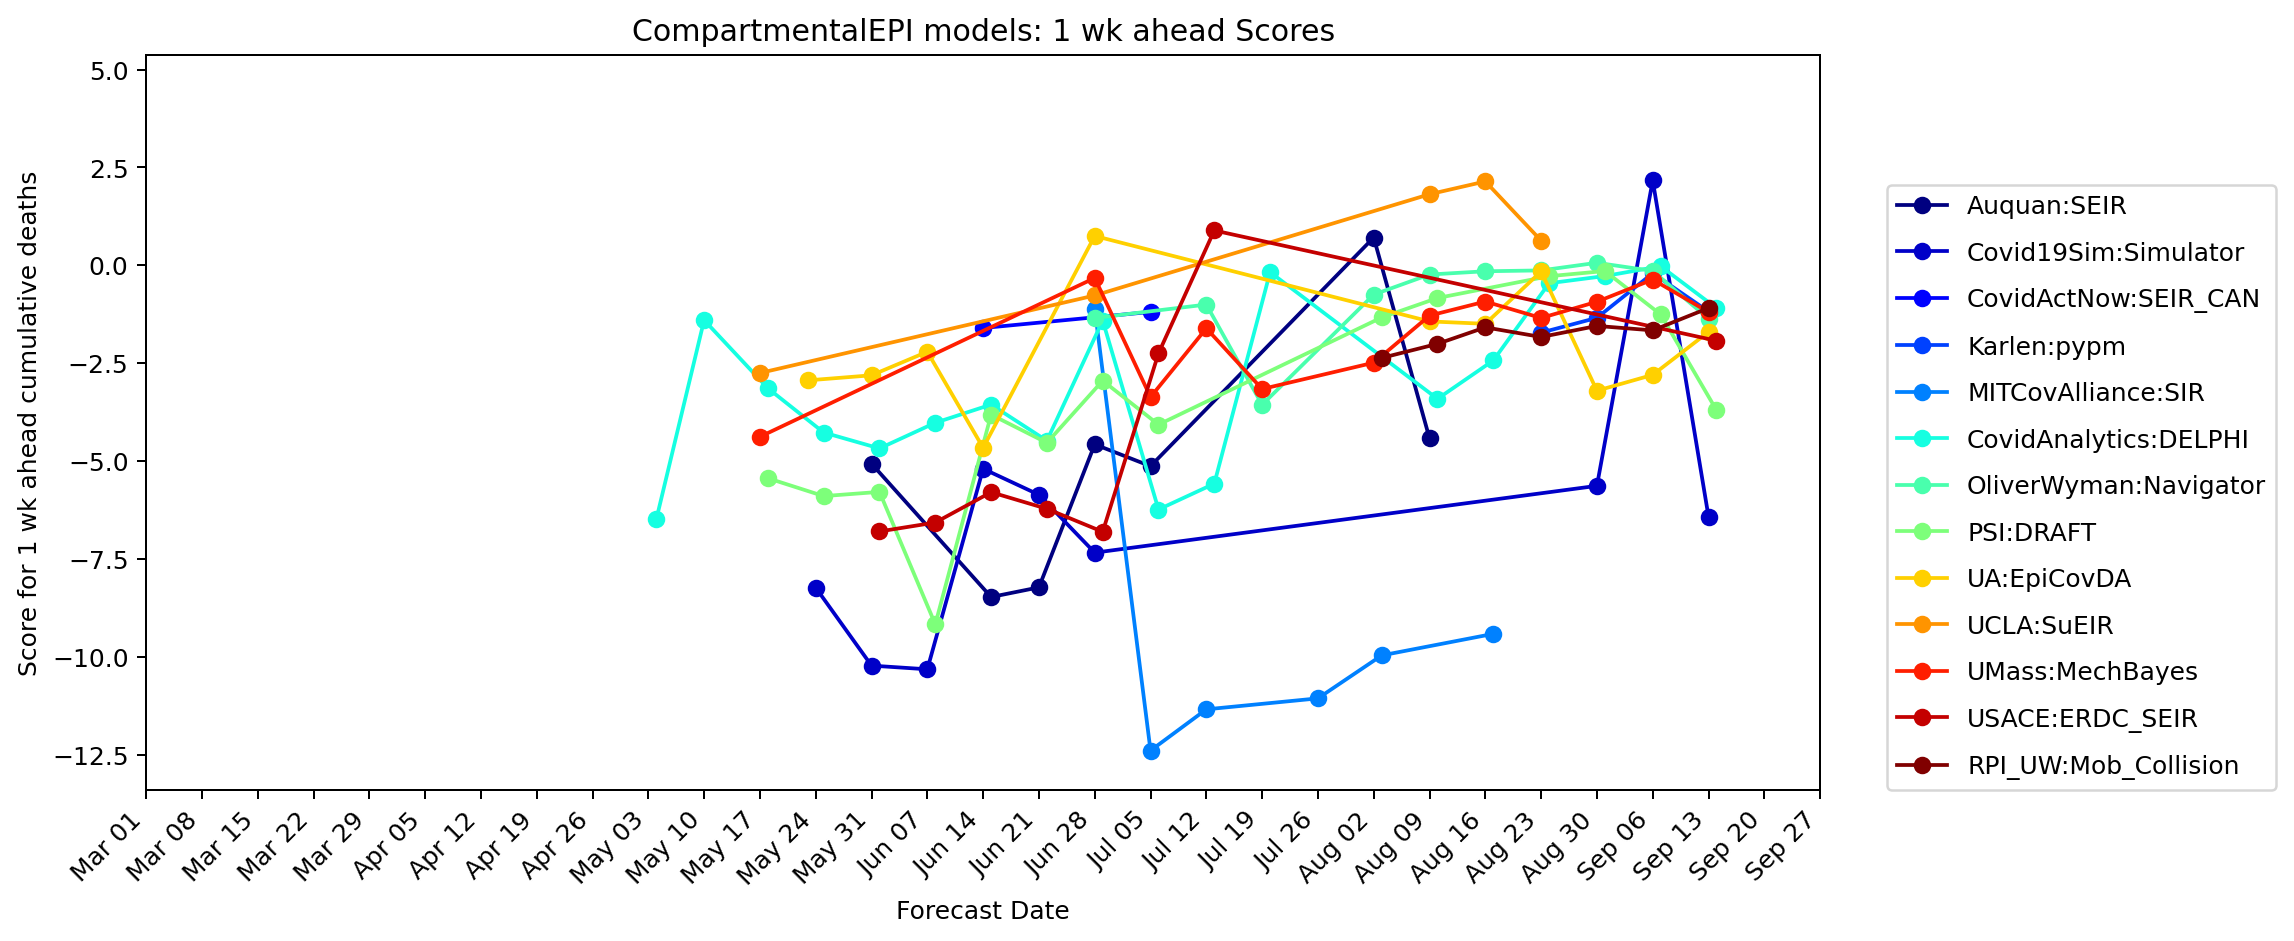

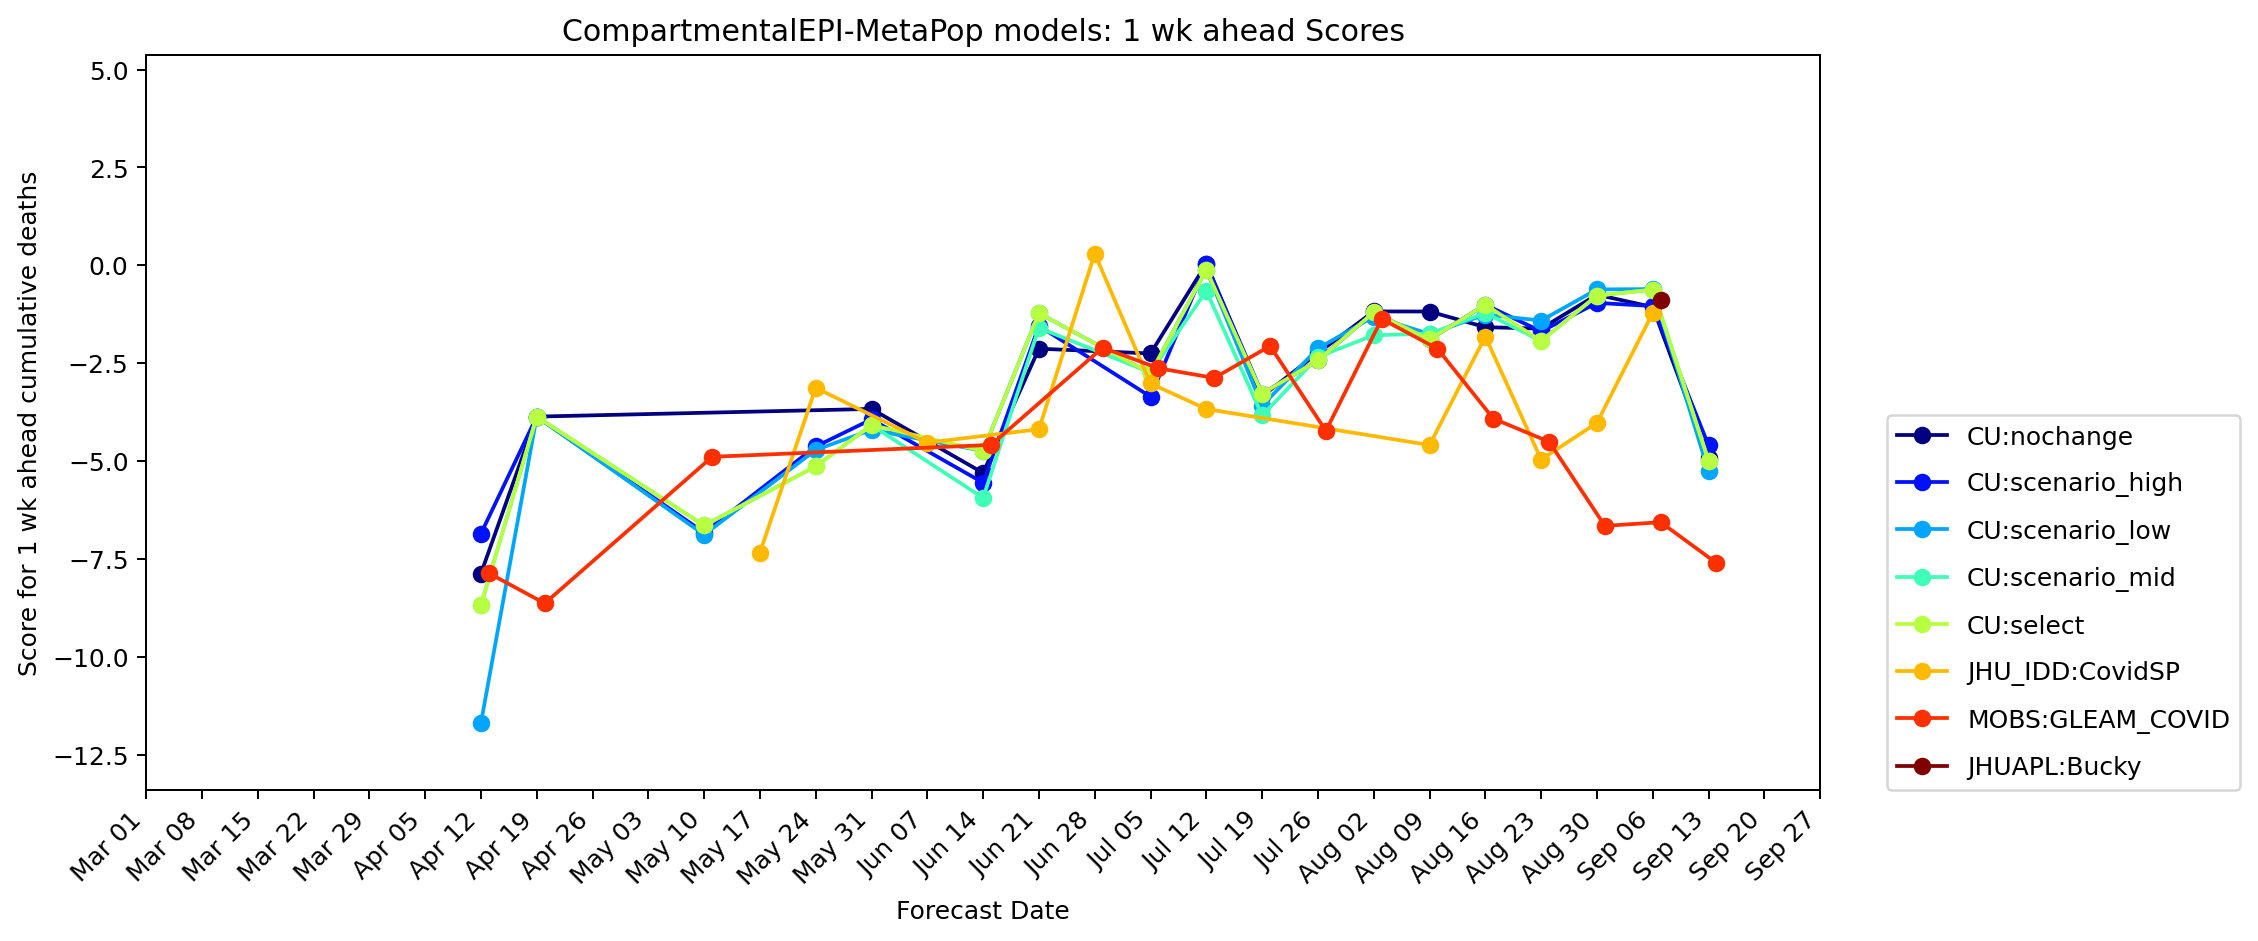

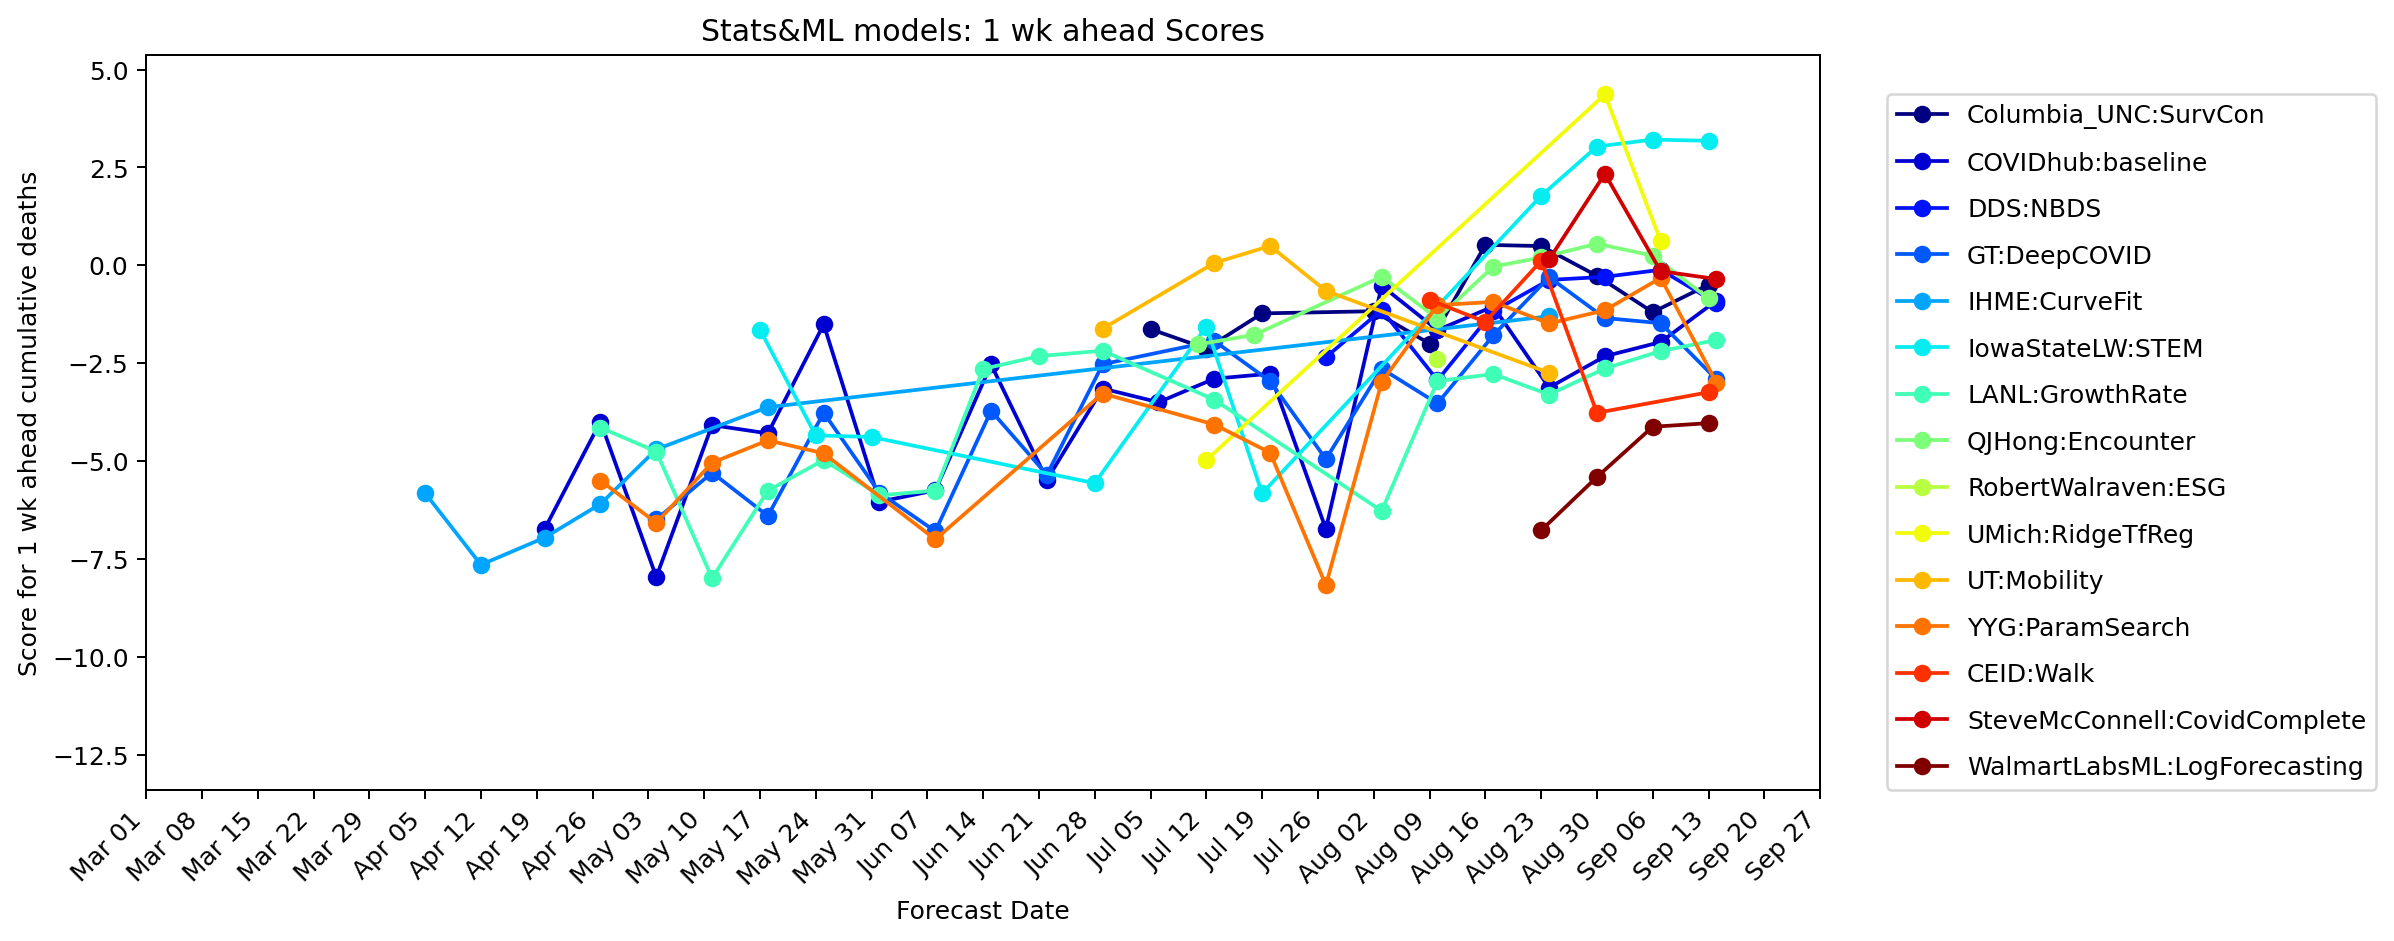

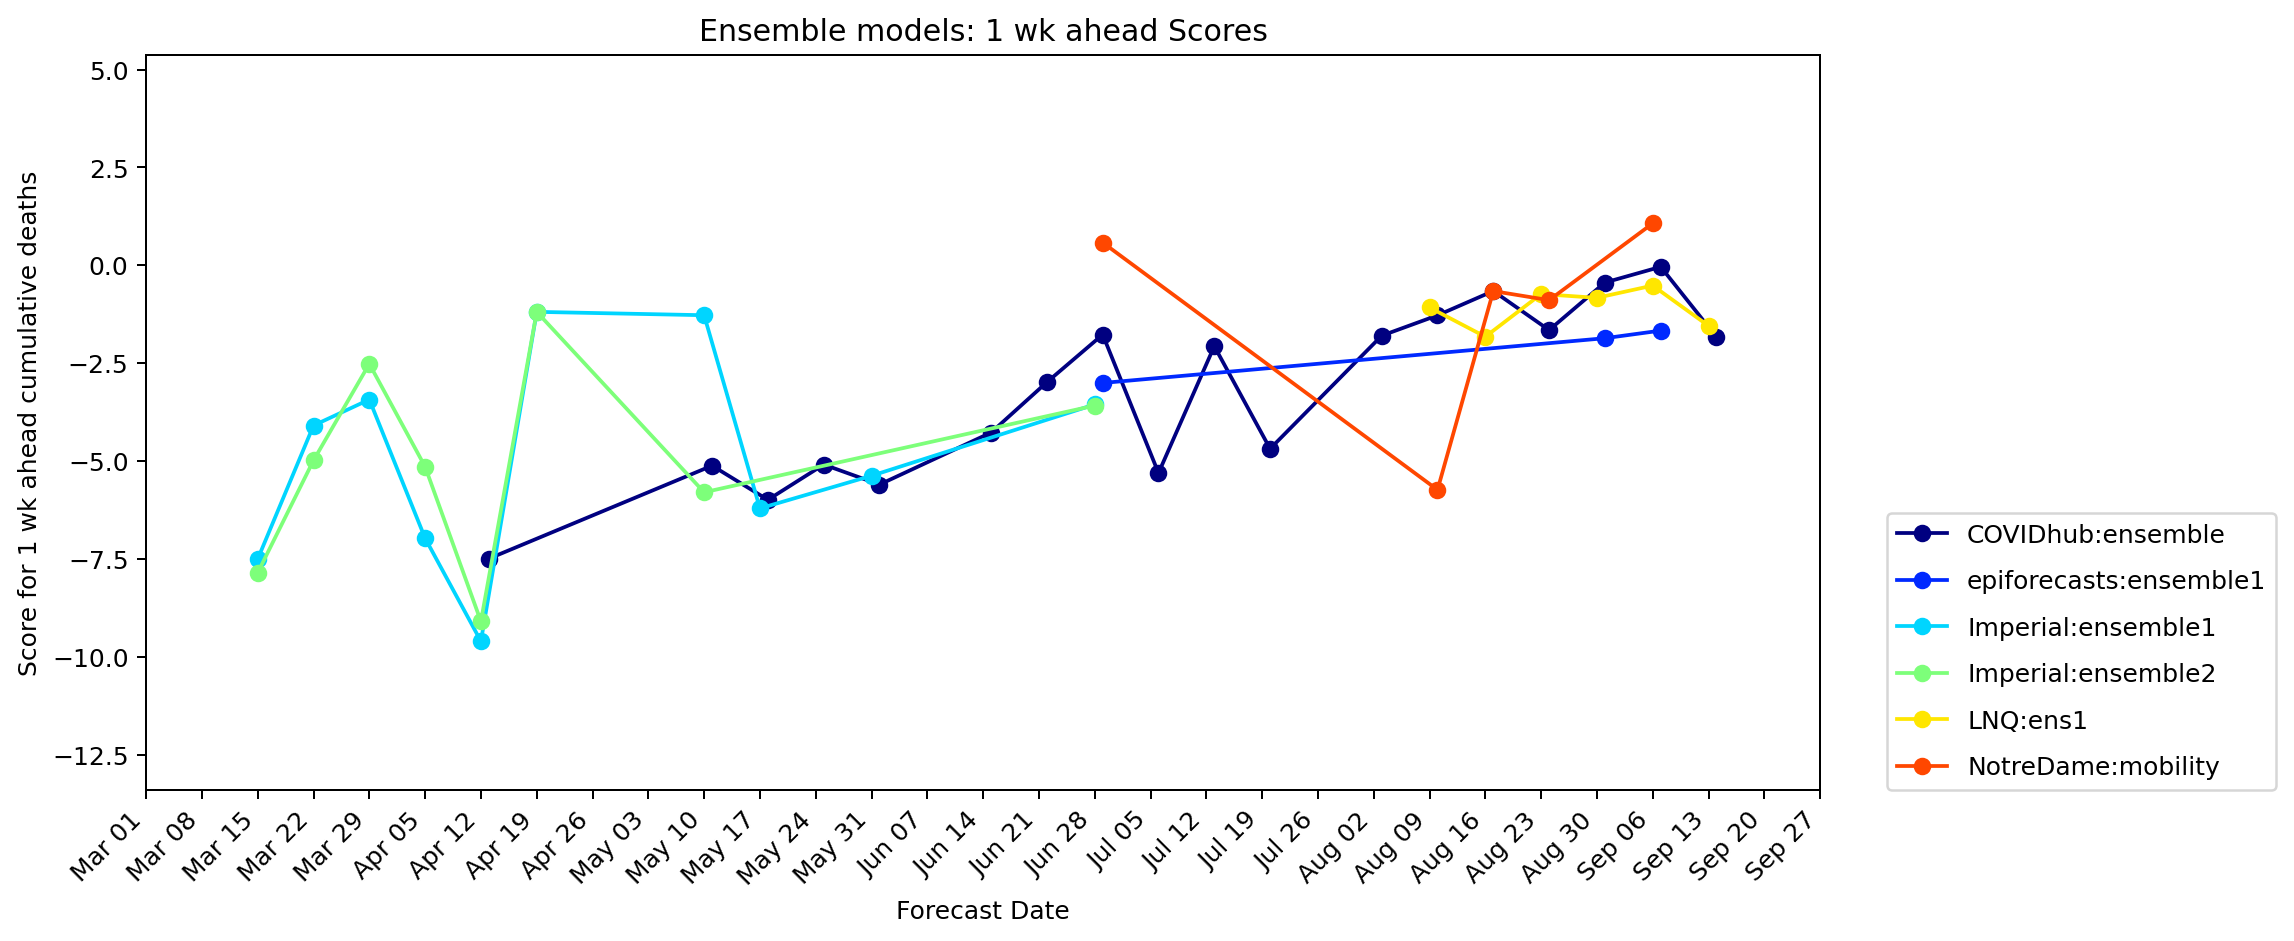

In [5]:
plotgroupsFD(ScoreboardDeaths, modeltypesDeaths, gitdir, 1, 'Death')

/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed/scores.py:240: RuntimeWarning: Mean of empty slice
  MerdfPRED['nanmean'] = MerdfPRED.apply(lambda row : np.nanmean(row['score']), axis = 1)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


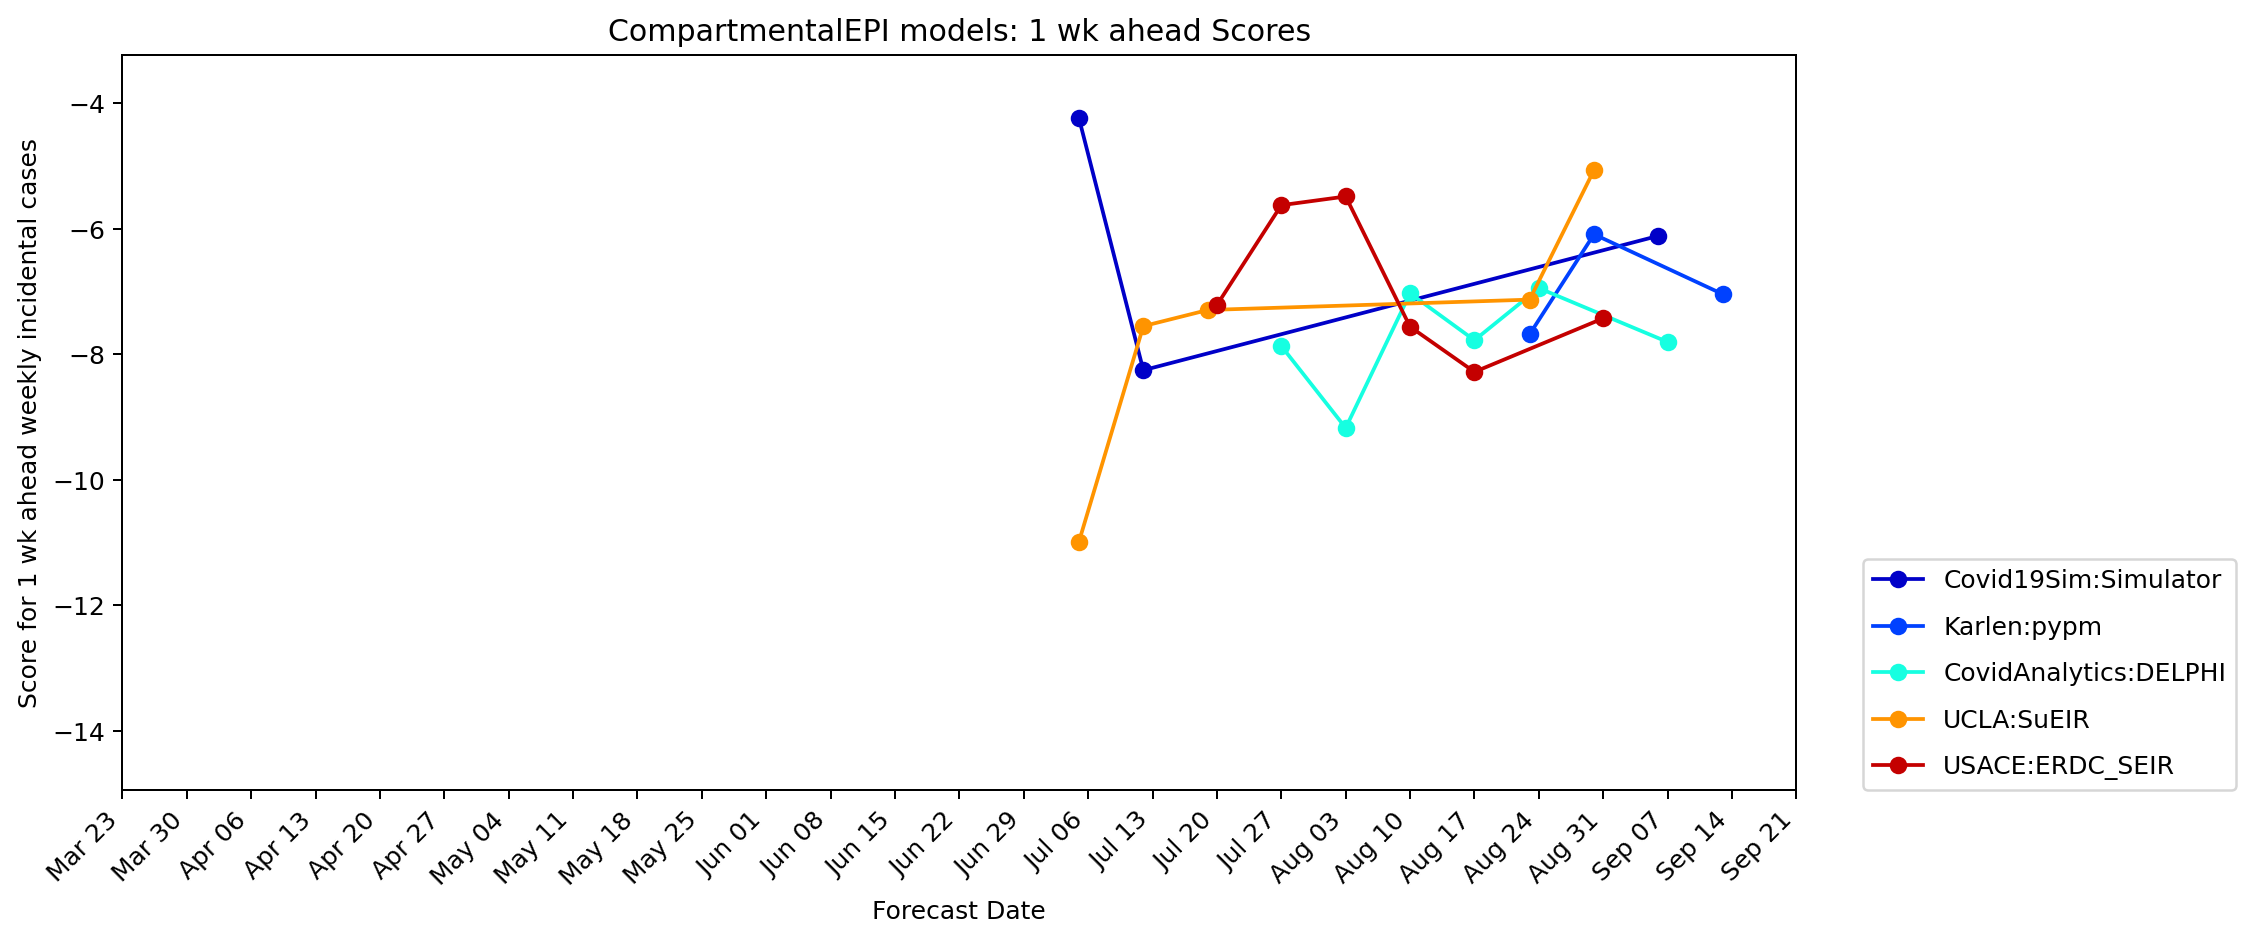

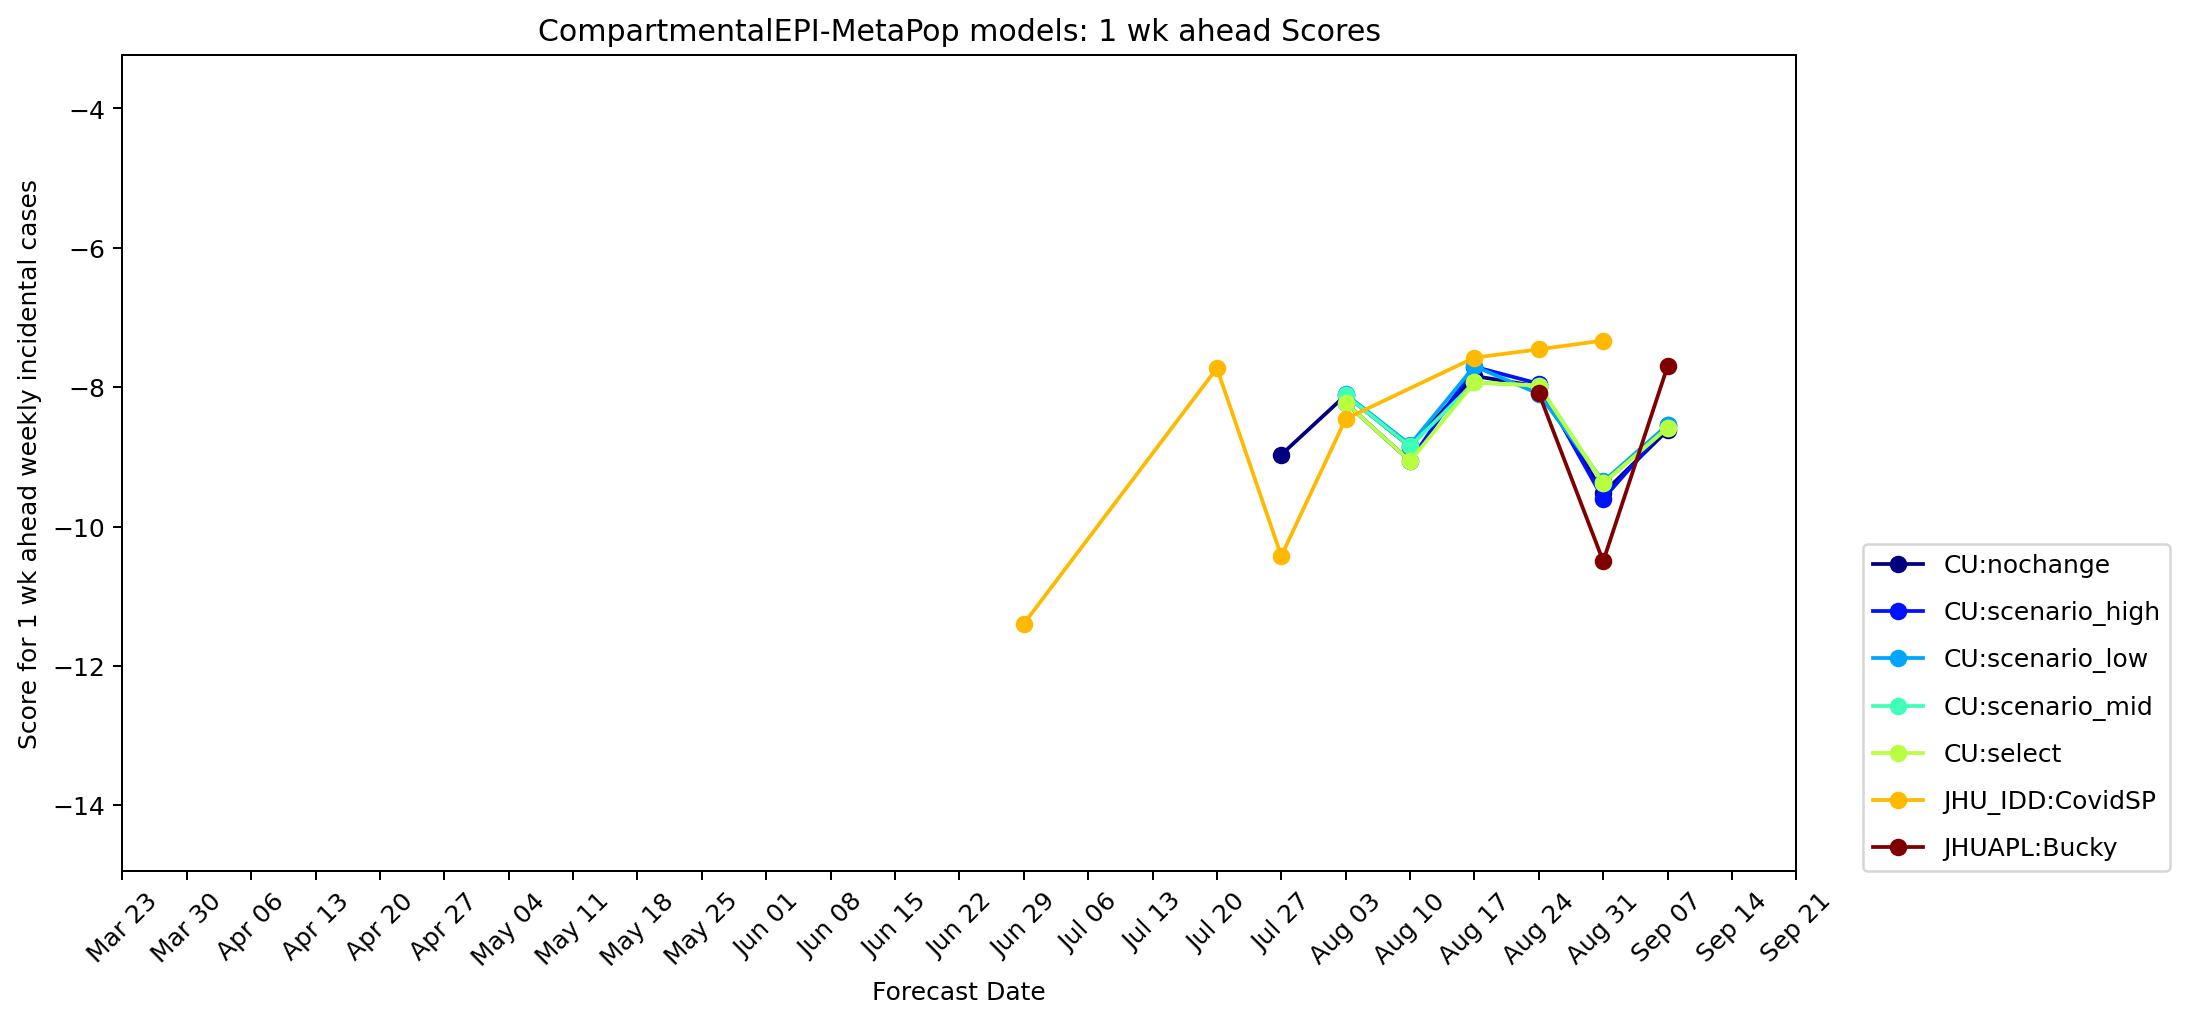

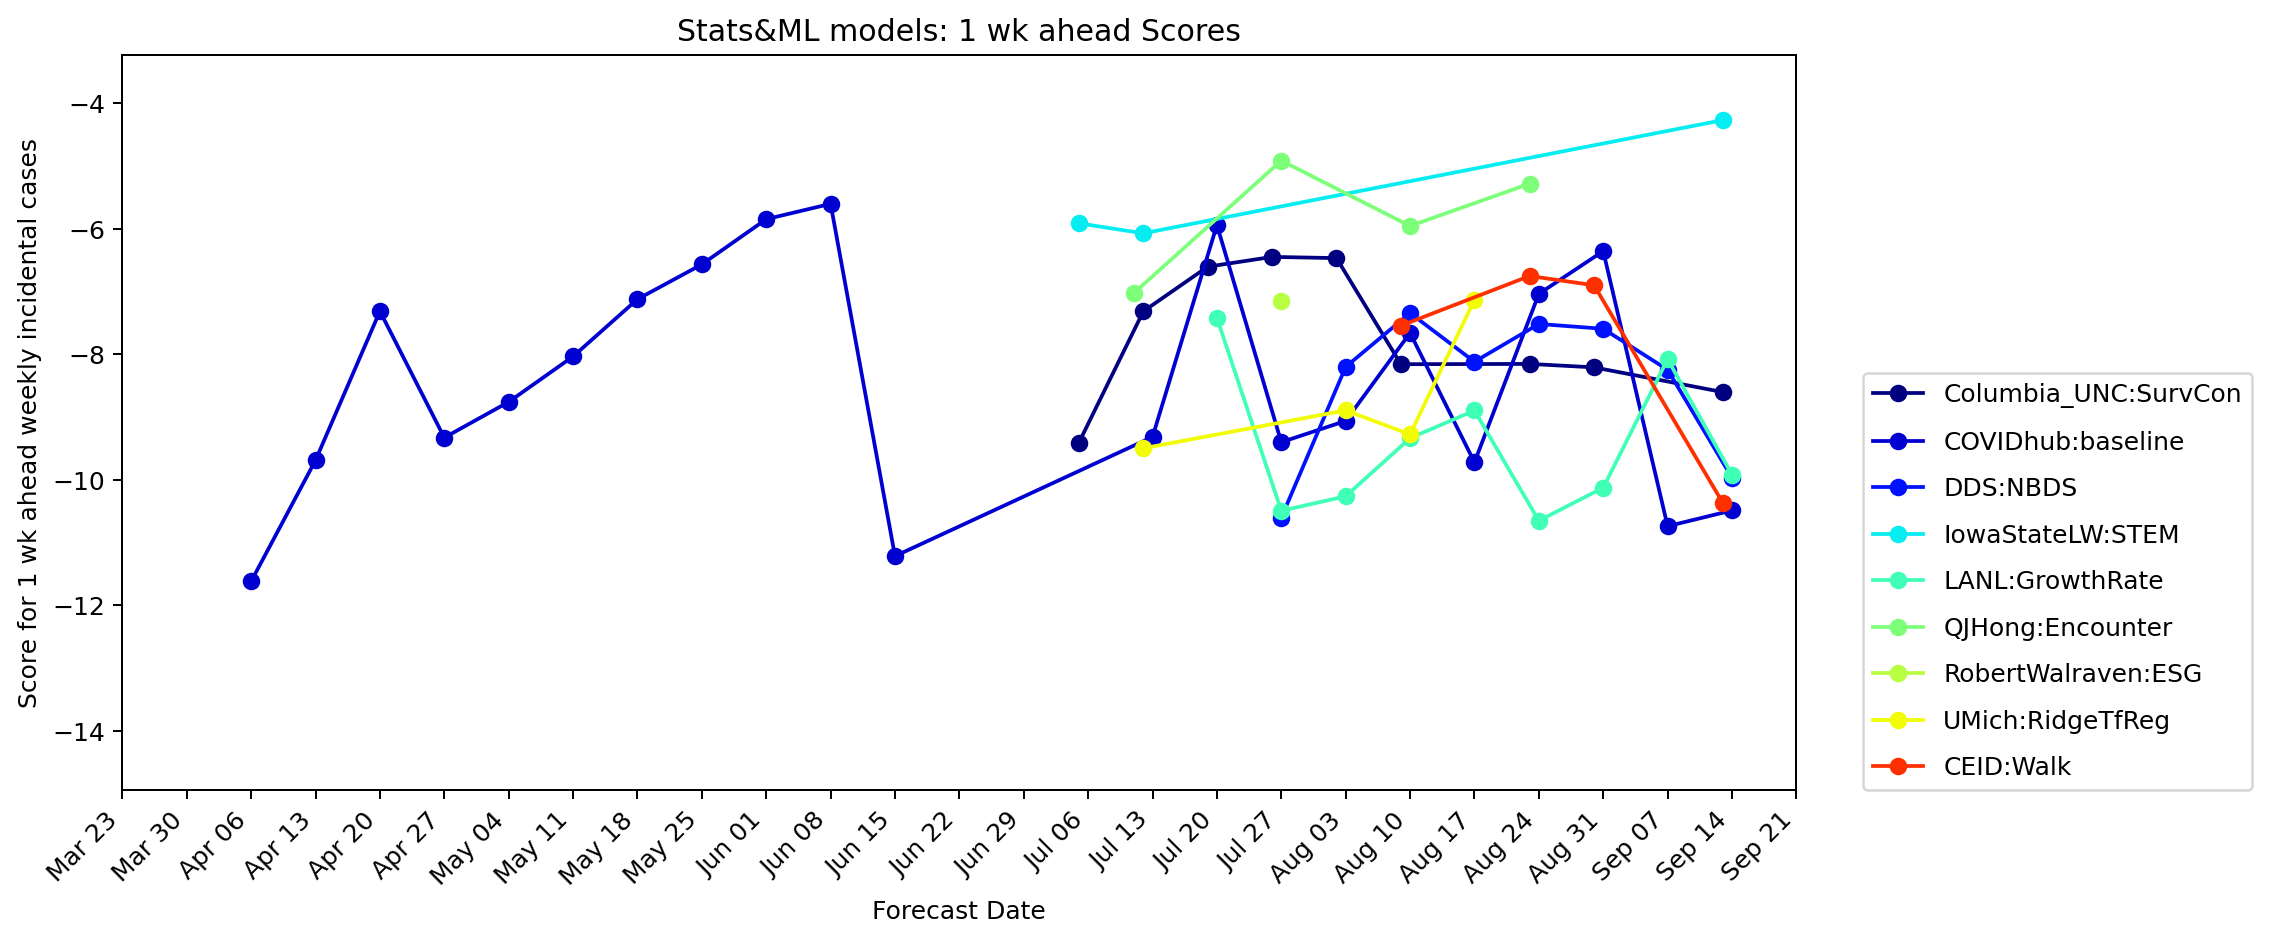

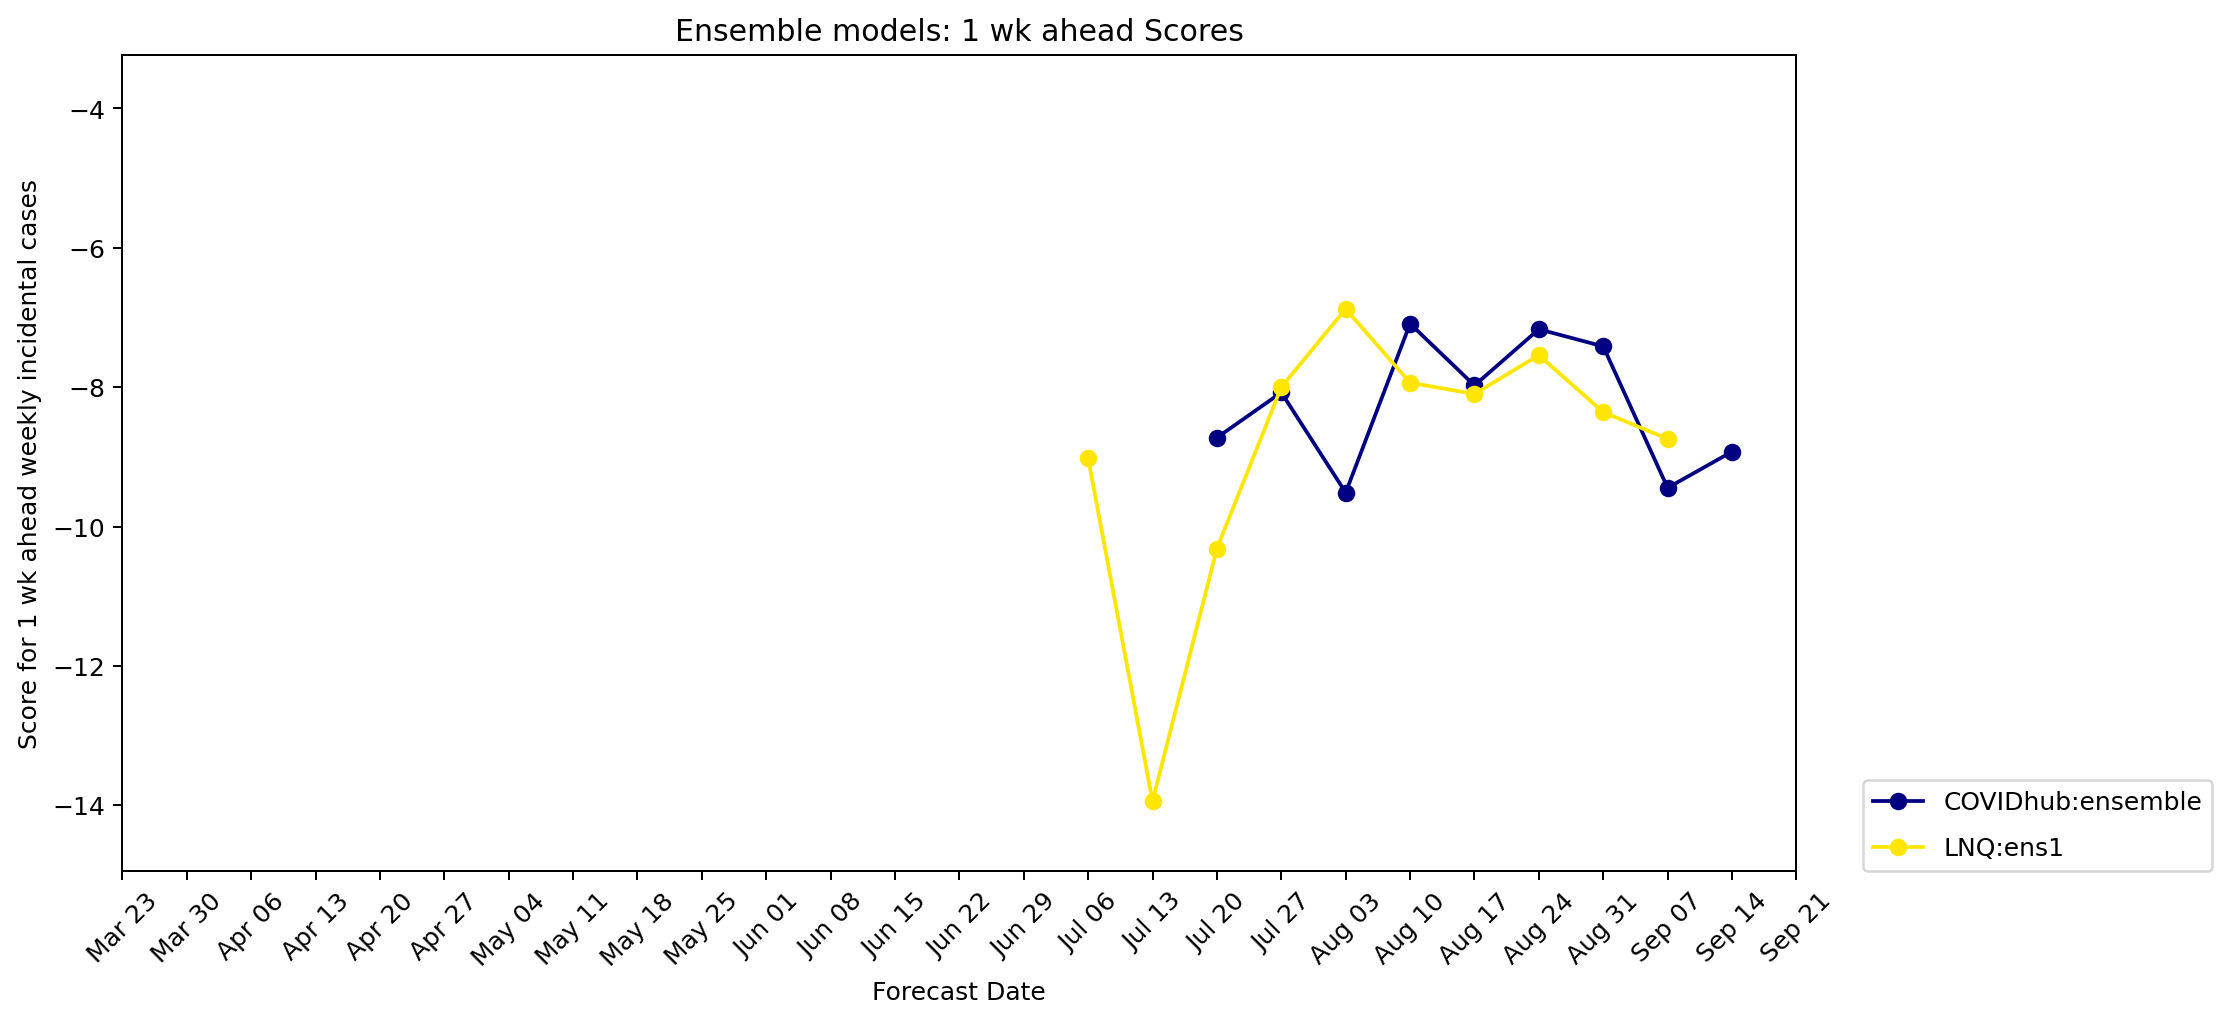

In [7]:
plotgroupsFD(ScoreboardCases, modeltypesCases, gitdir, 1, 'Case')

## Plots by target end date

/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed/scores.py:268: RuntimeWarning: Mean of empty slice
  MerdfPRED['nanmean'] = MerdfPRED.apply(lambda row : np.nanmean(row['score']), axis = 1)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


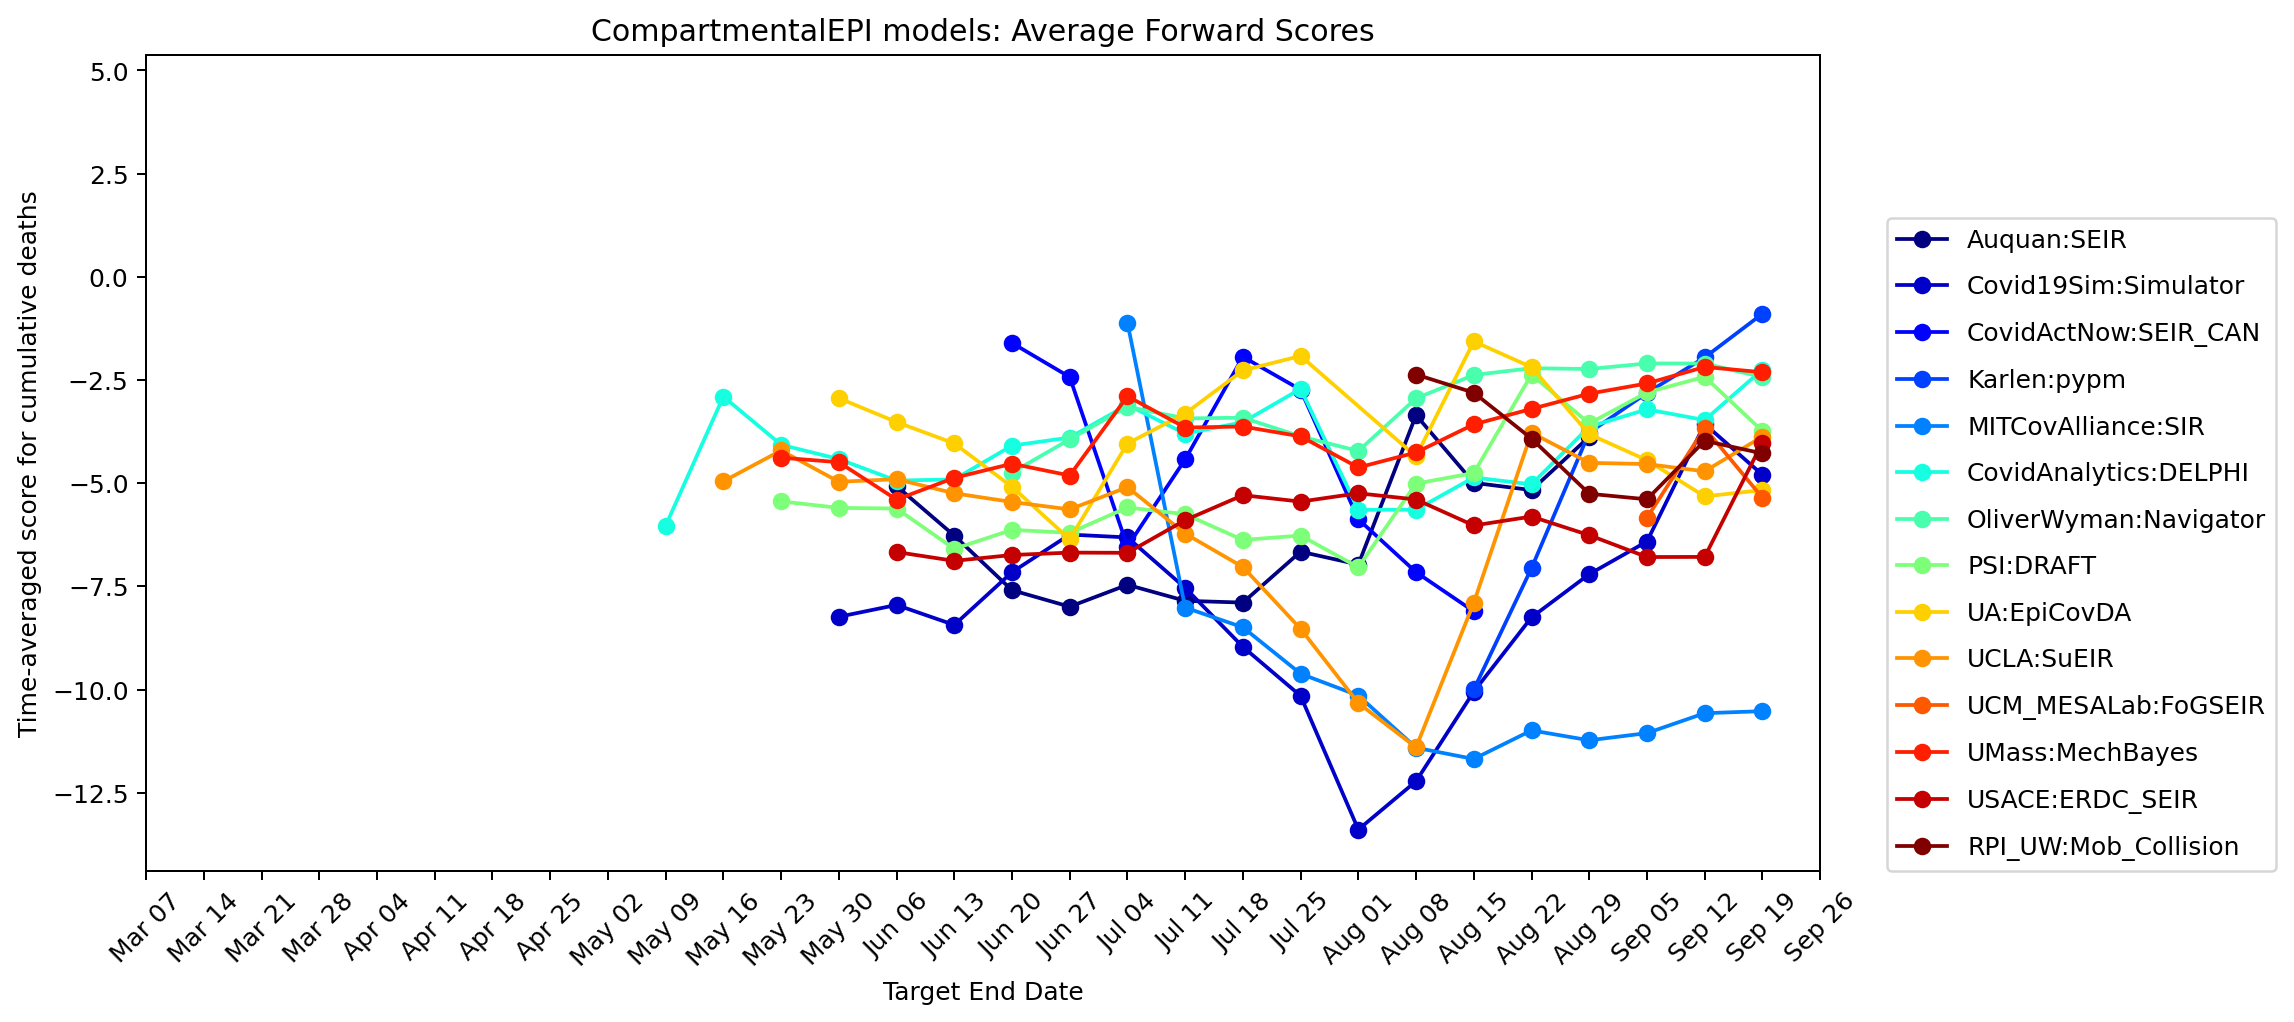

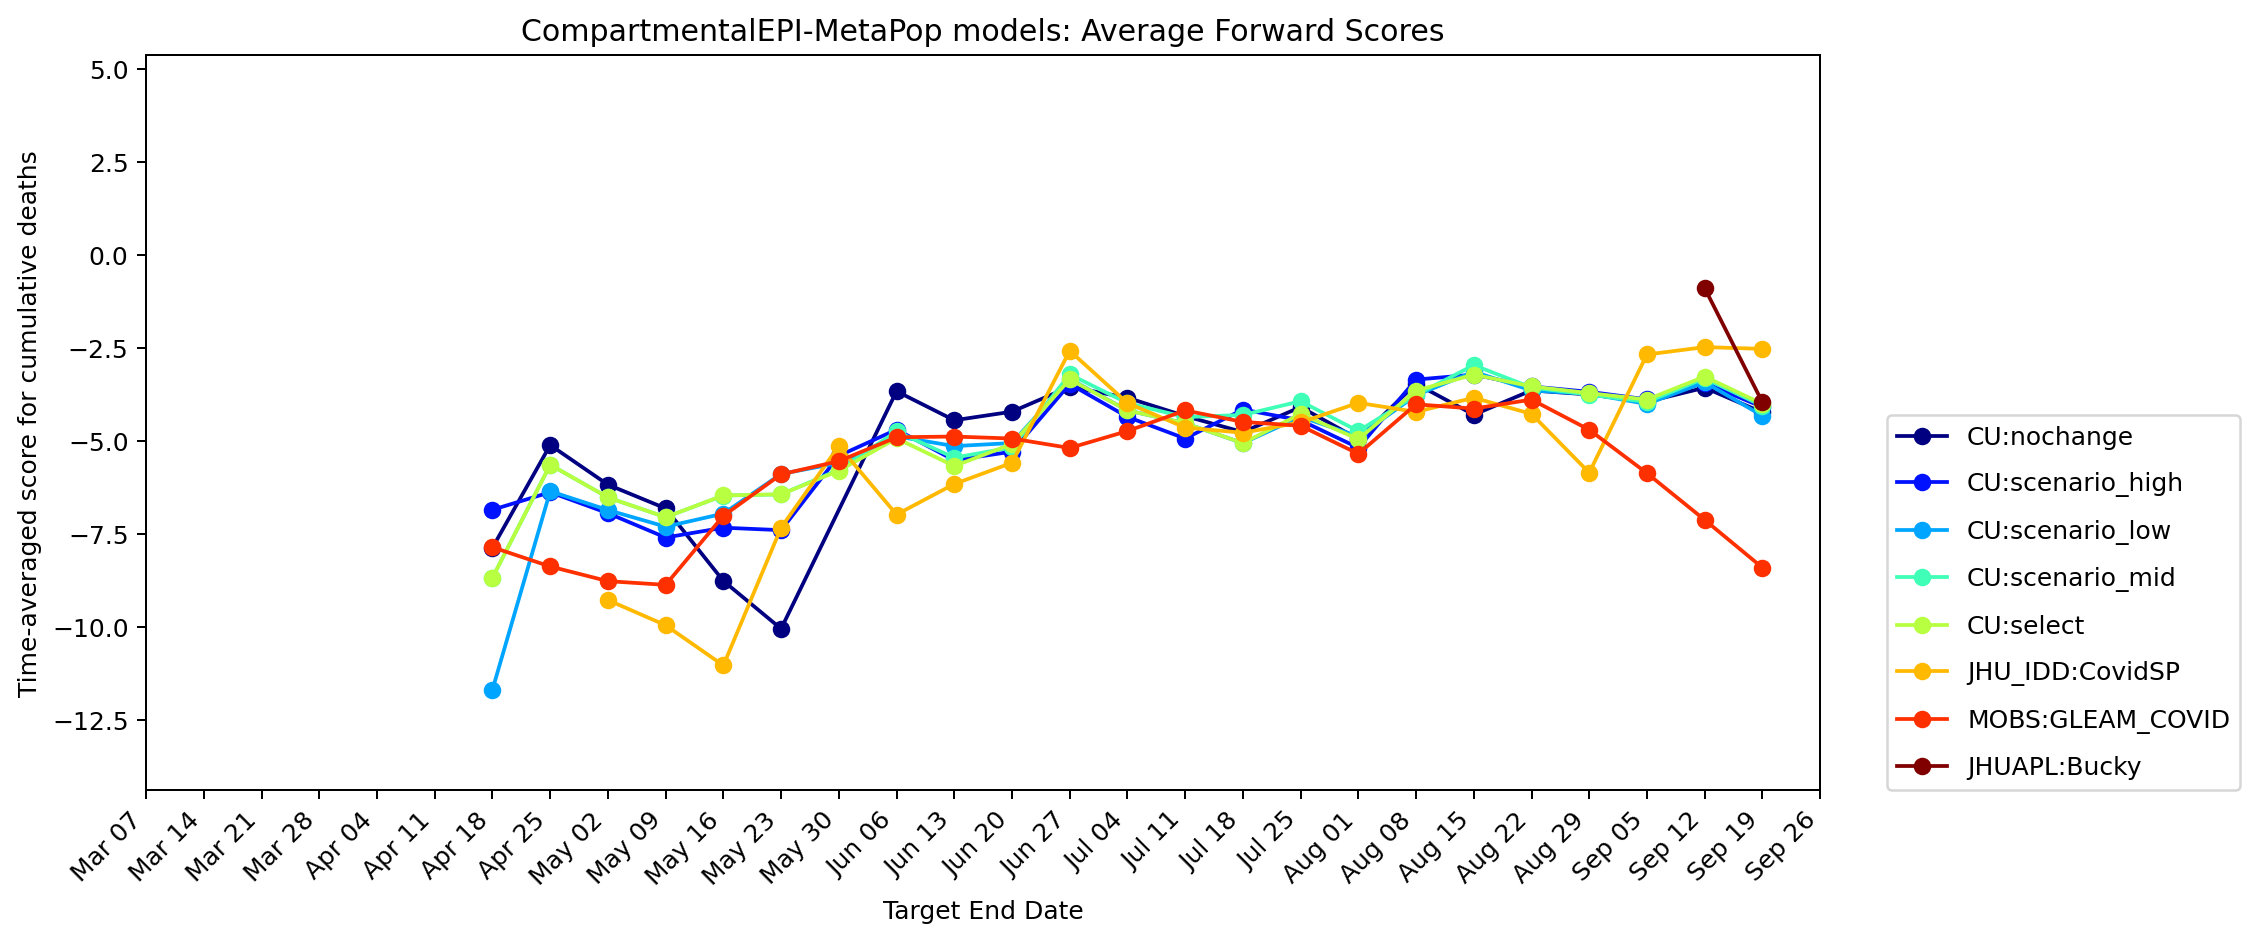

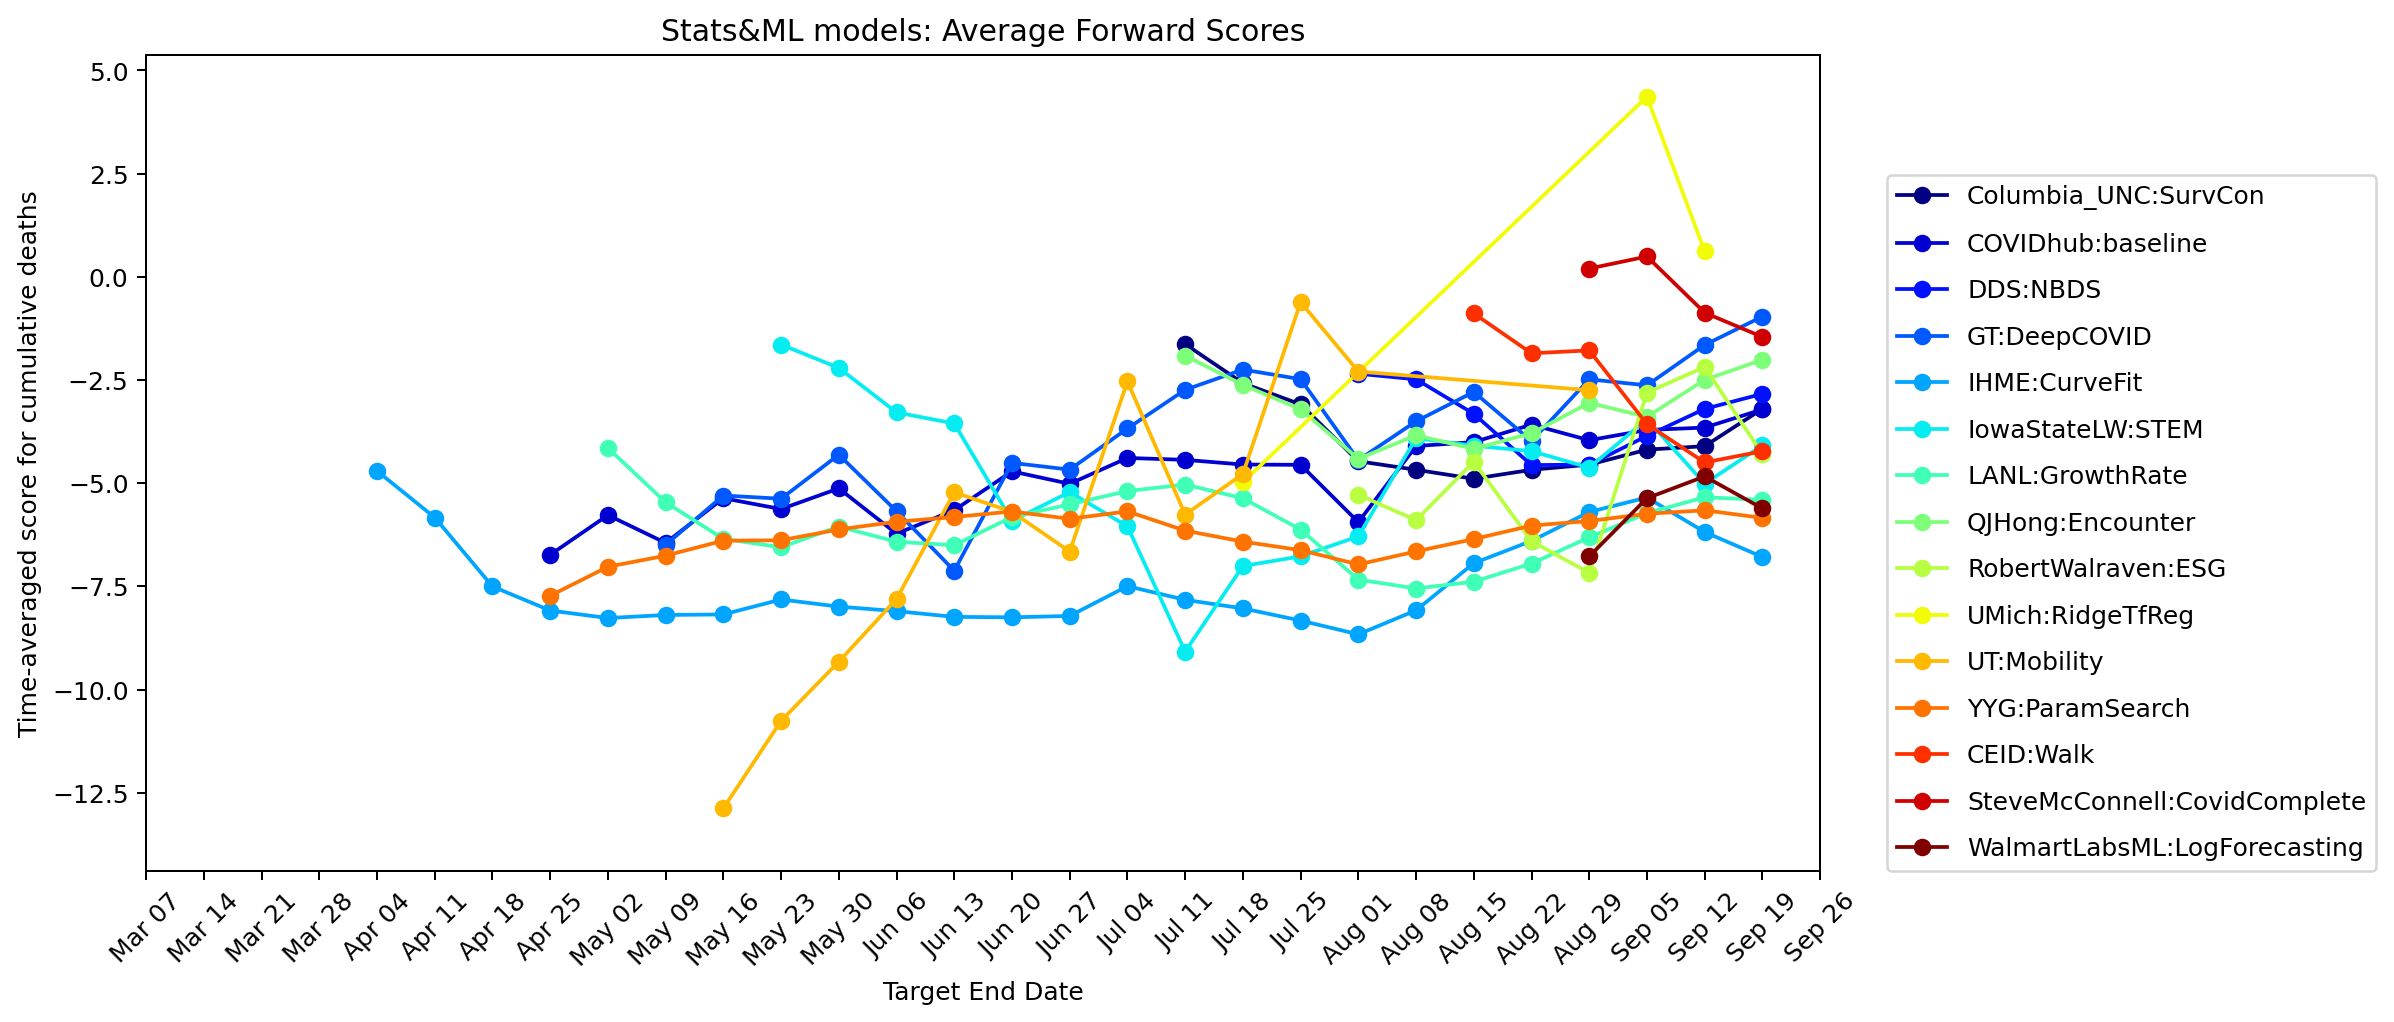

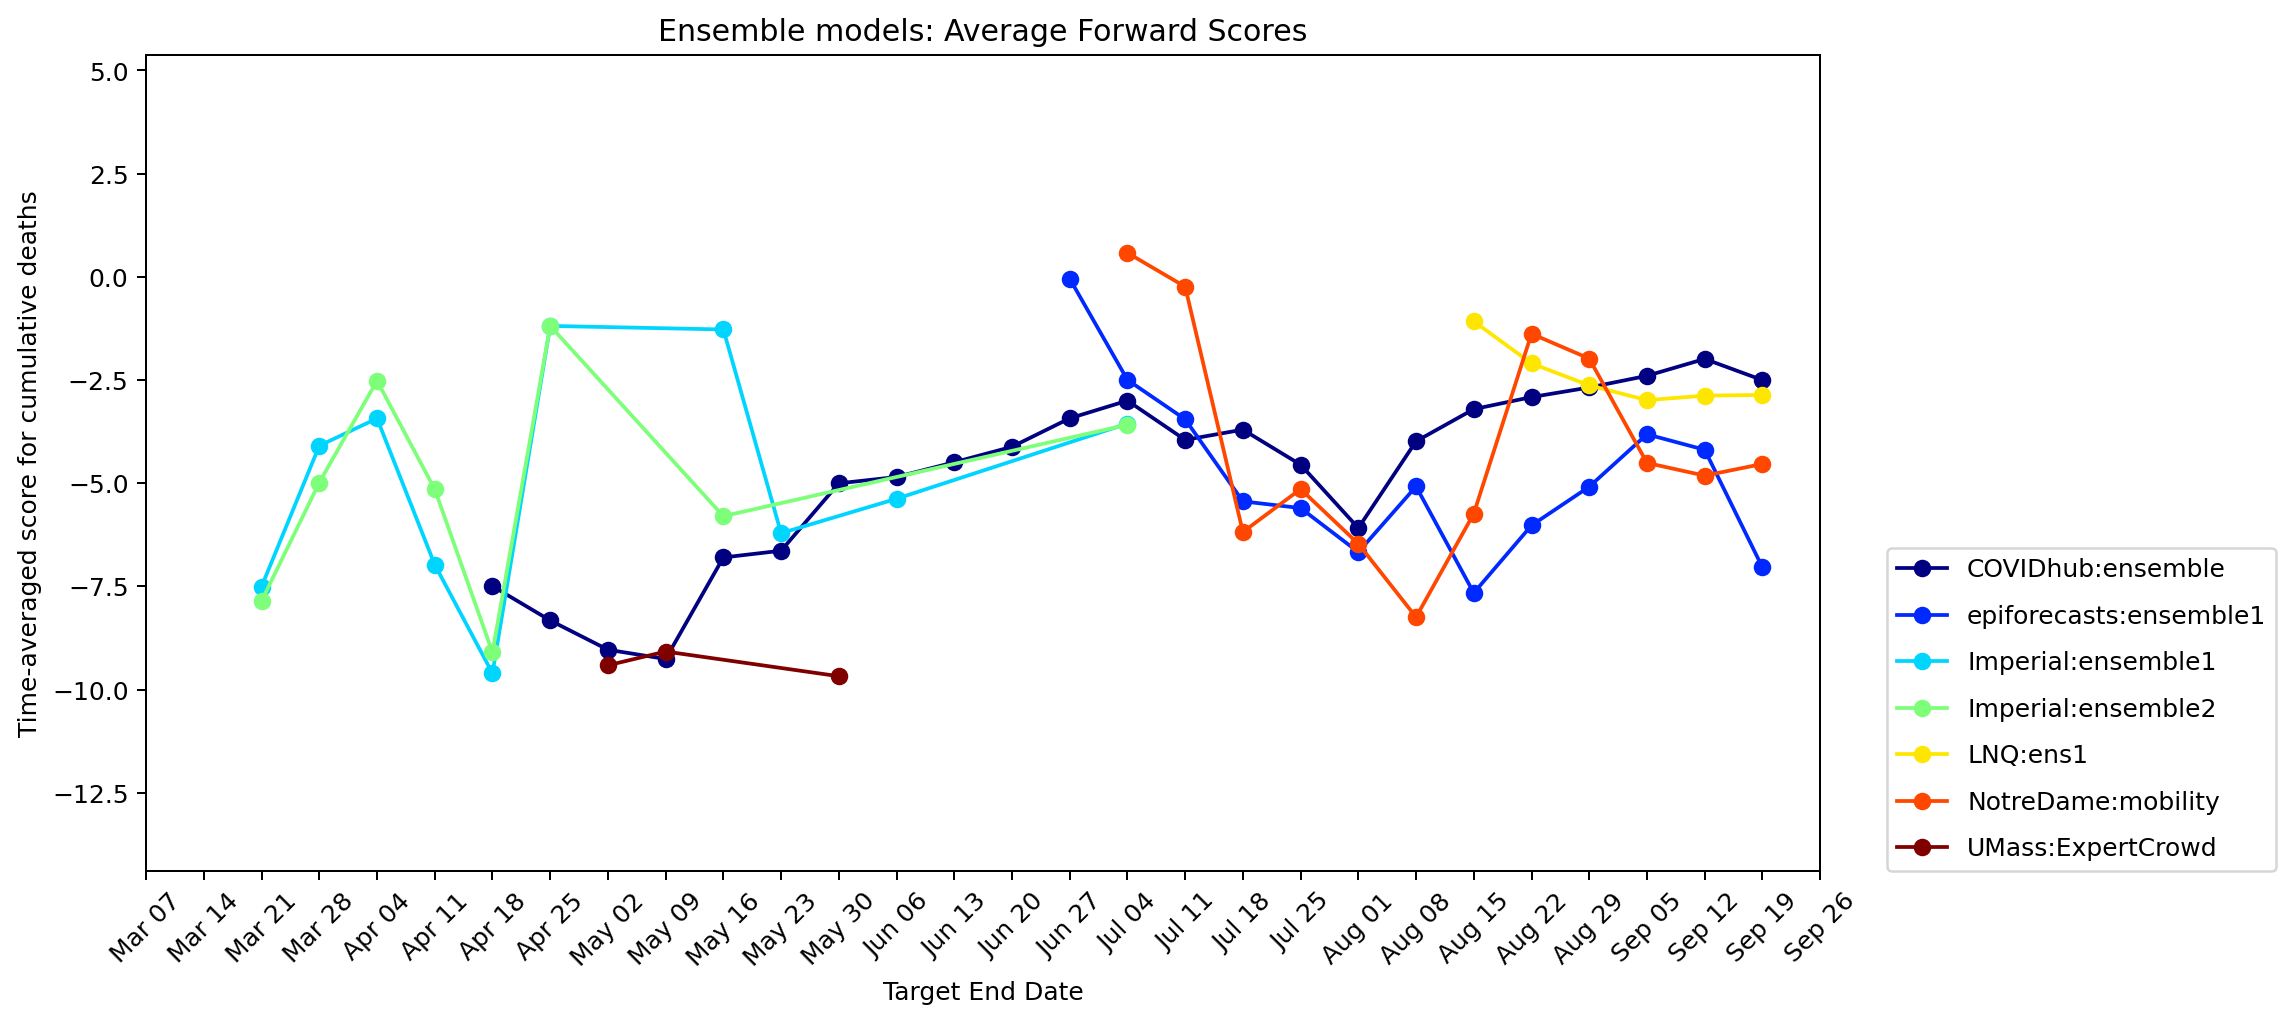

In [6]:
plotgroupsTD(ScoreboardDeaths, modeltypesDeaths, gitdir, 'Death')

/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed/scores.py:268: RuntimeWarning: Mean of empty slice
  MerdfPRED['nanmean'] = MerdfPRED.apply(lambda row : np.nanmean(row['score']), axis = 1)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


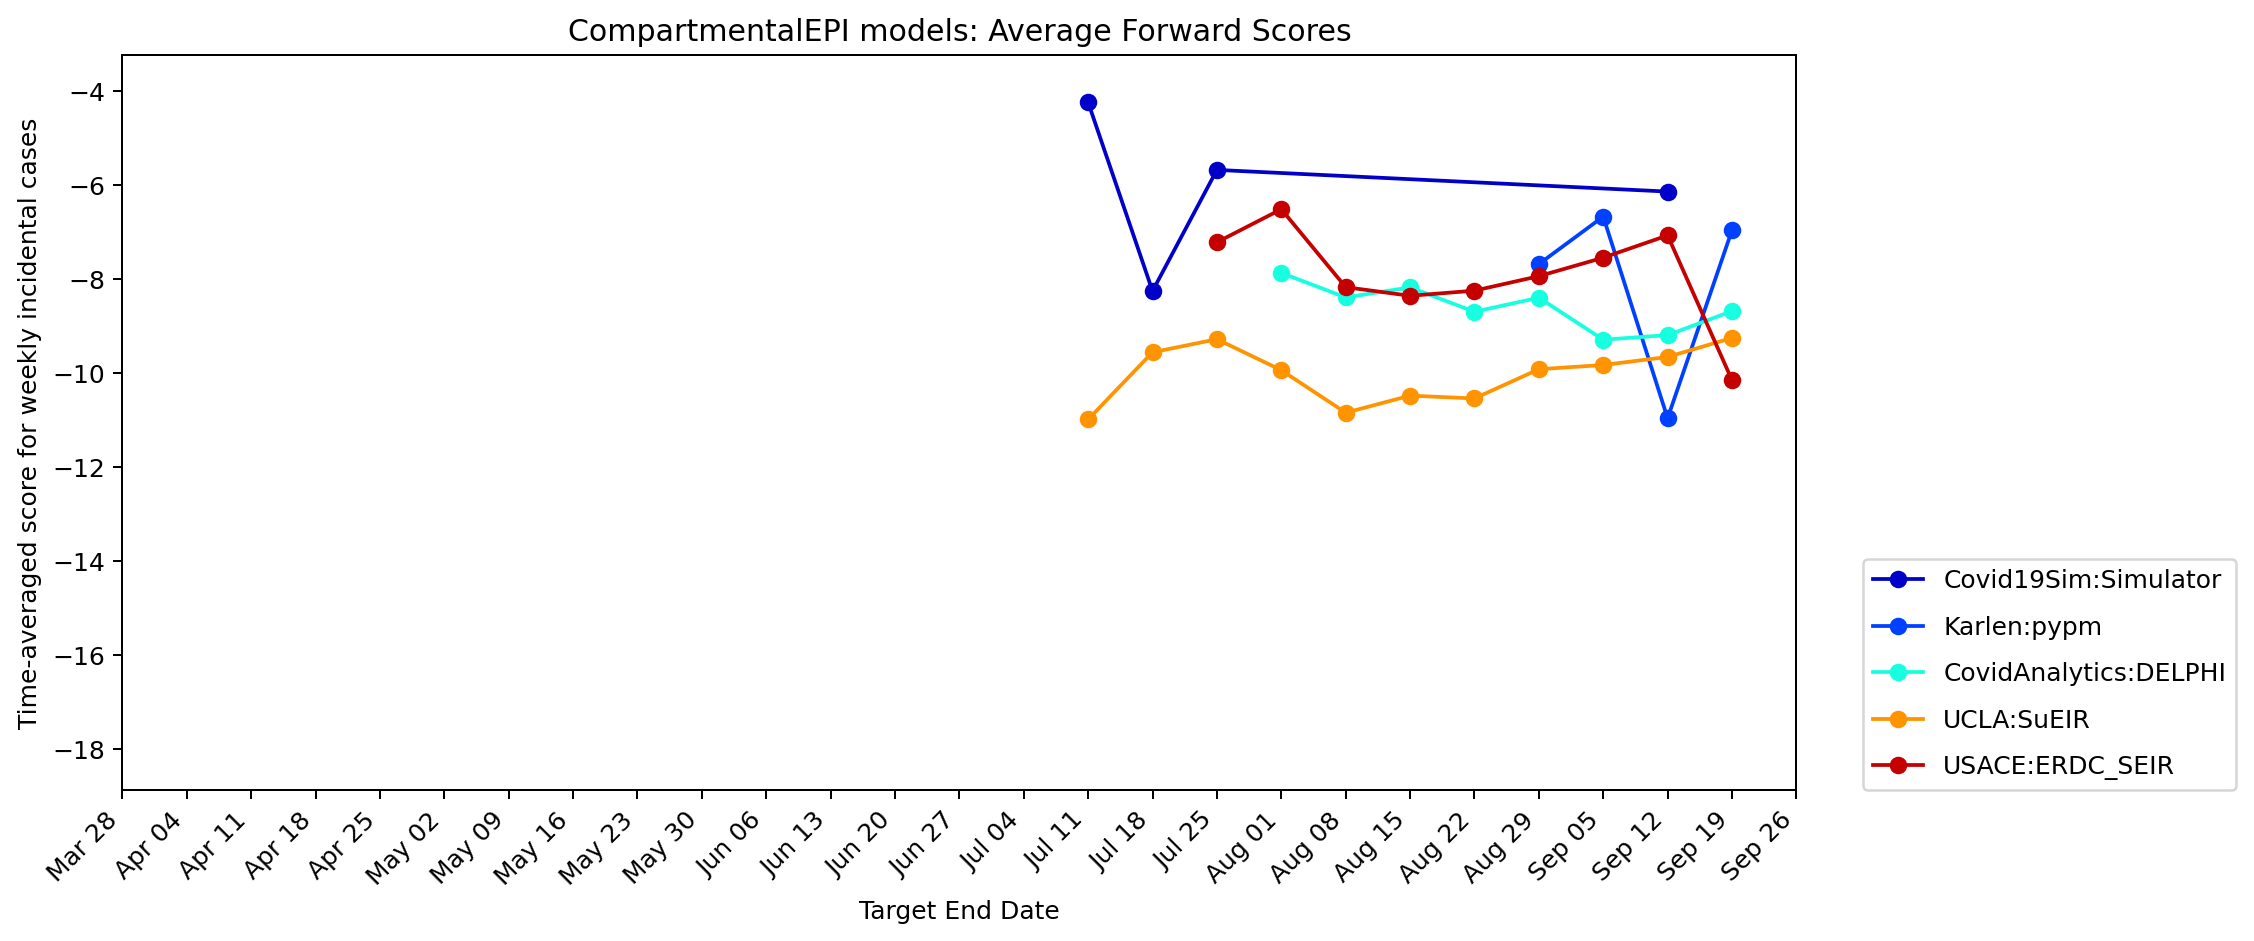

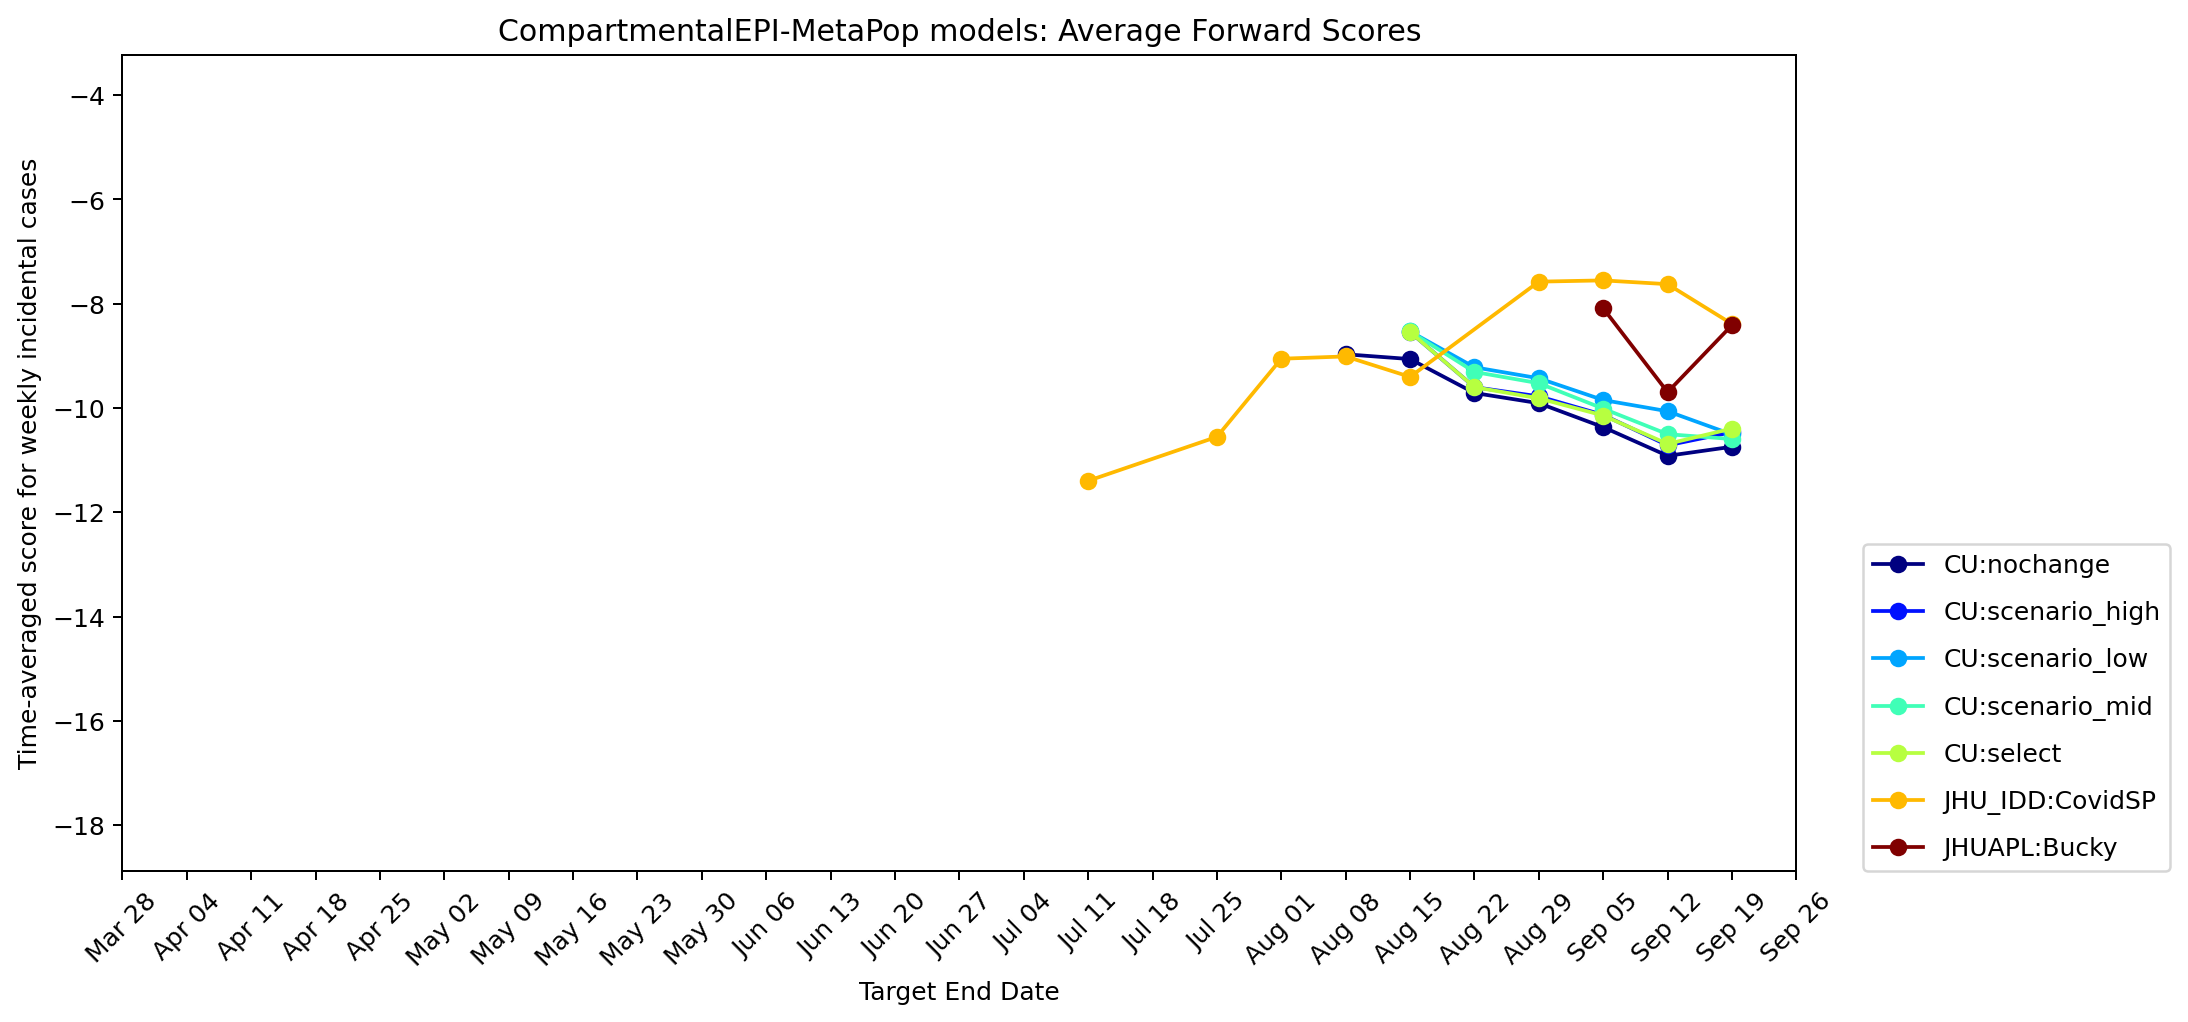

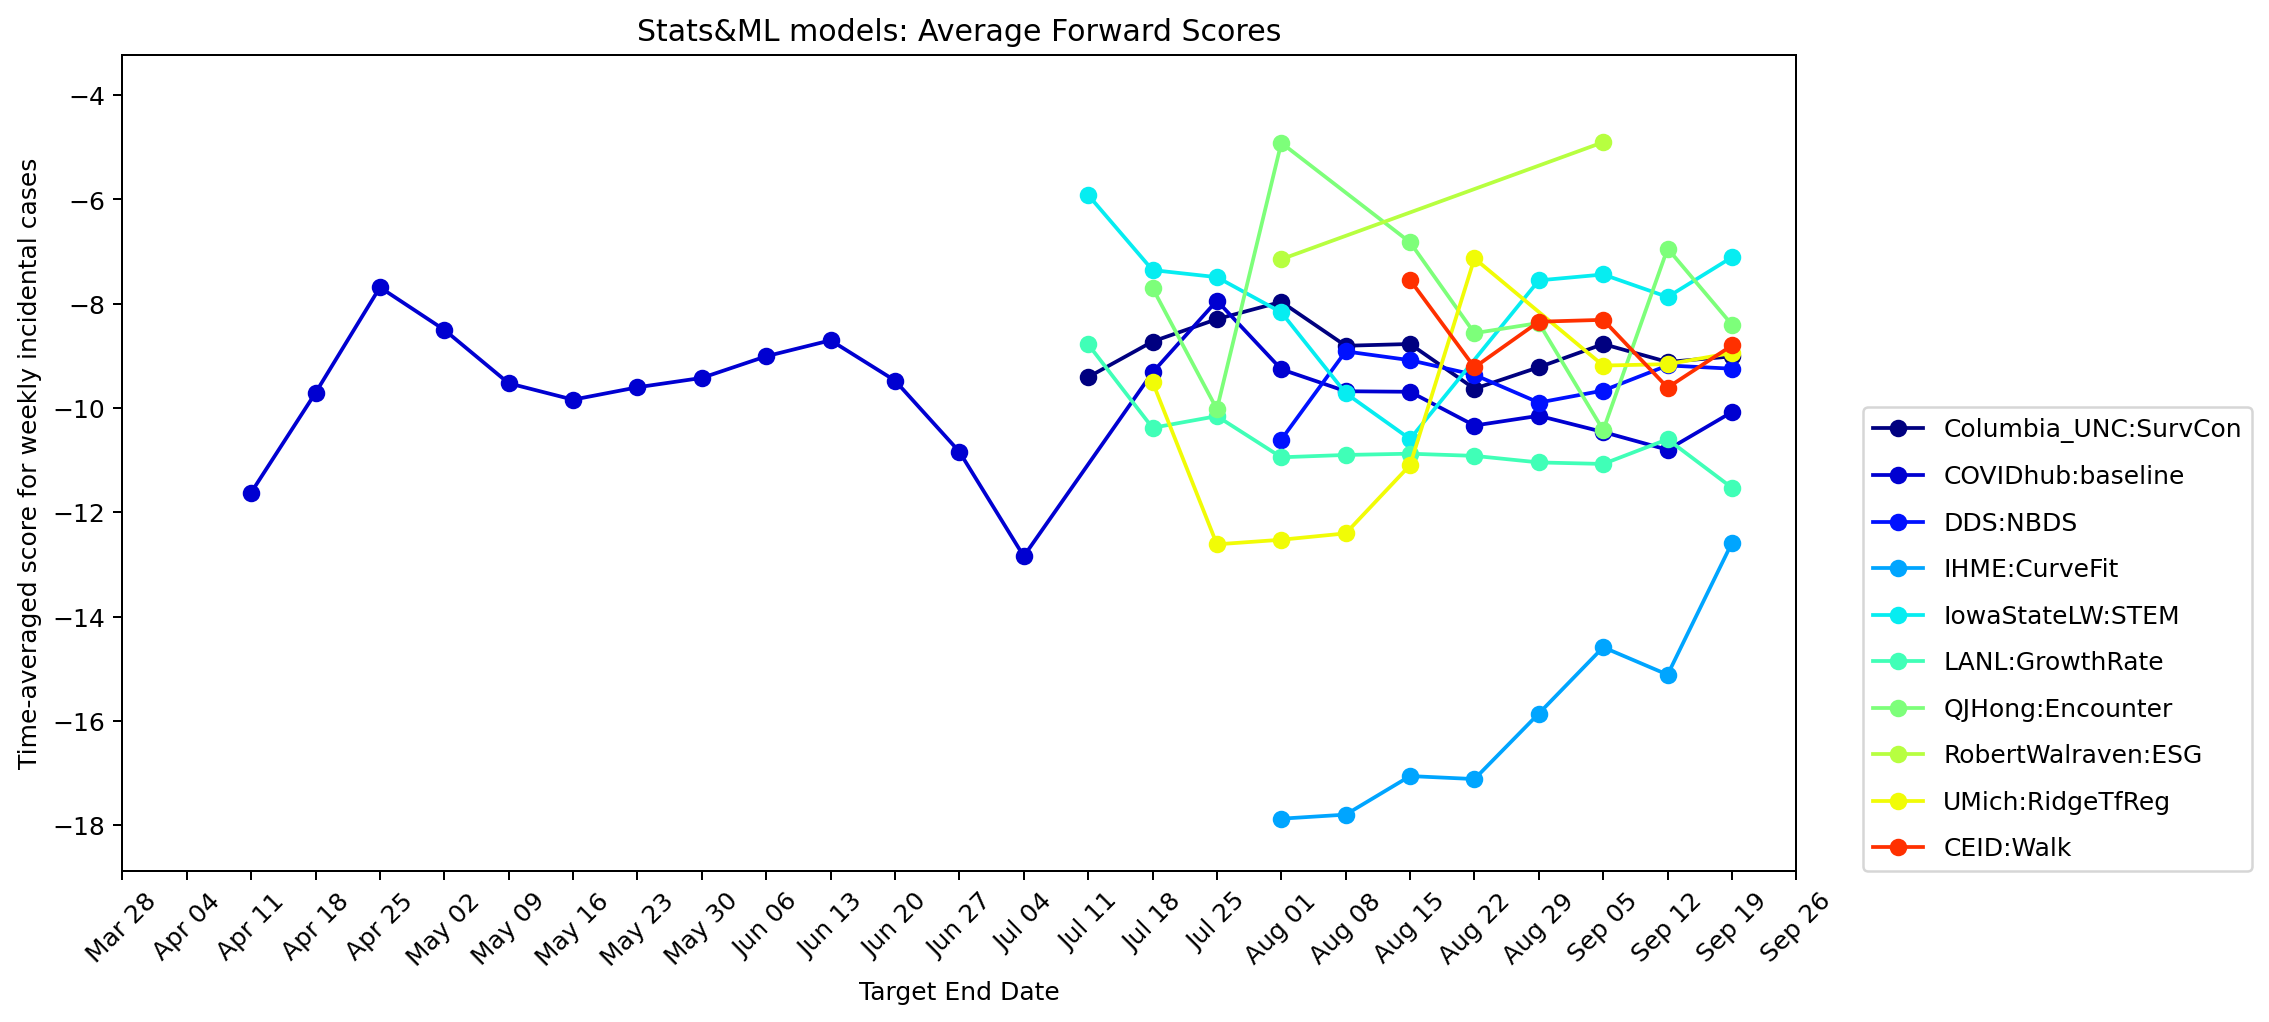

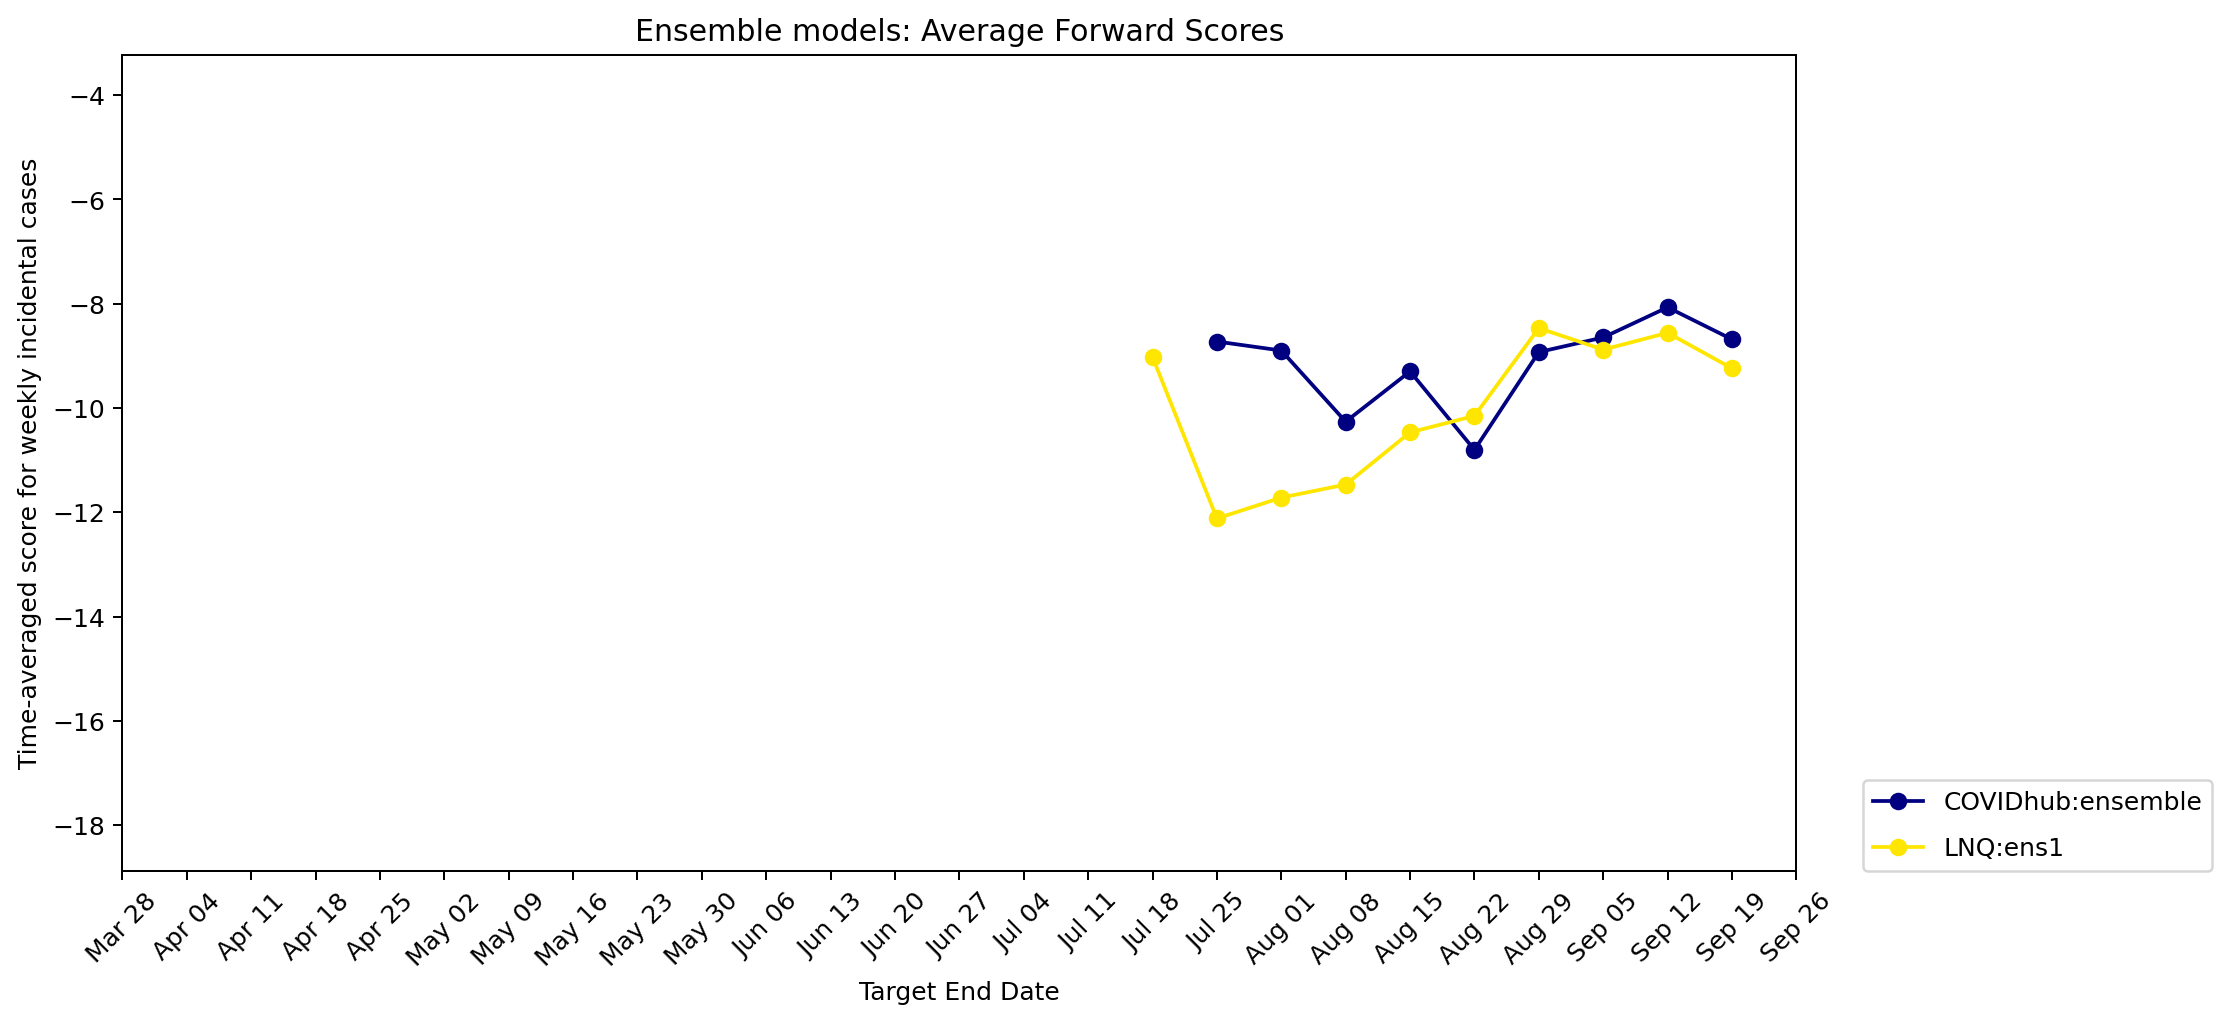

In [8]:
plotgroupsTD(ScoreboardCases, modeltypesCases, gitdir, 'Case')

### ADD TO GITHUB

In [ ]:
mypwd = !pwd
os.chdir(gitdir)
# #!git remote set-url origin https://github.com/ONYLAB/Scoreboard.git
# #!git config credential.helper store
# !git stash
# !git pull --rebase origin master
!git add --all
!git commit -am “UpdateFigures”
!git push -u origin master
os.chdir(mypwd[0])